# Lending Club Case Study
_author: Adrish Maity_

__Business Objective:__ Understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

__Tools used for analysis:__

Language : Python
Libraries : pandas, numpy, matplotlib, seaborn, re, sklearn, datetime


## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from datetime import datetime as dt
import re
from sklearn.preprocessing import LabelEncoder # used to encode categorical data to numeric data

# Setting display max columns to None to get all columns of dataframe at output
pd.options.display.max_columns = None

## Loading Dataset

In [2]:
# Load Dataset
# Keeping the default header columns
# Use "python" in place of default "c" engine to read the data as it is
loan = pd.read_csv("loan.csv", engine='python')

## Get the feel about the dataset and Data Cleaning

In [3]:
# Get all columns with null percentages
cols_with_null_percentage = round(100*(loan.isnull().sum()/len(loan.index)),2)

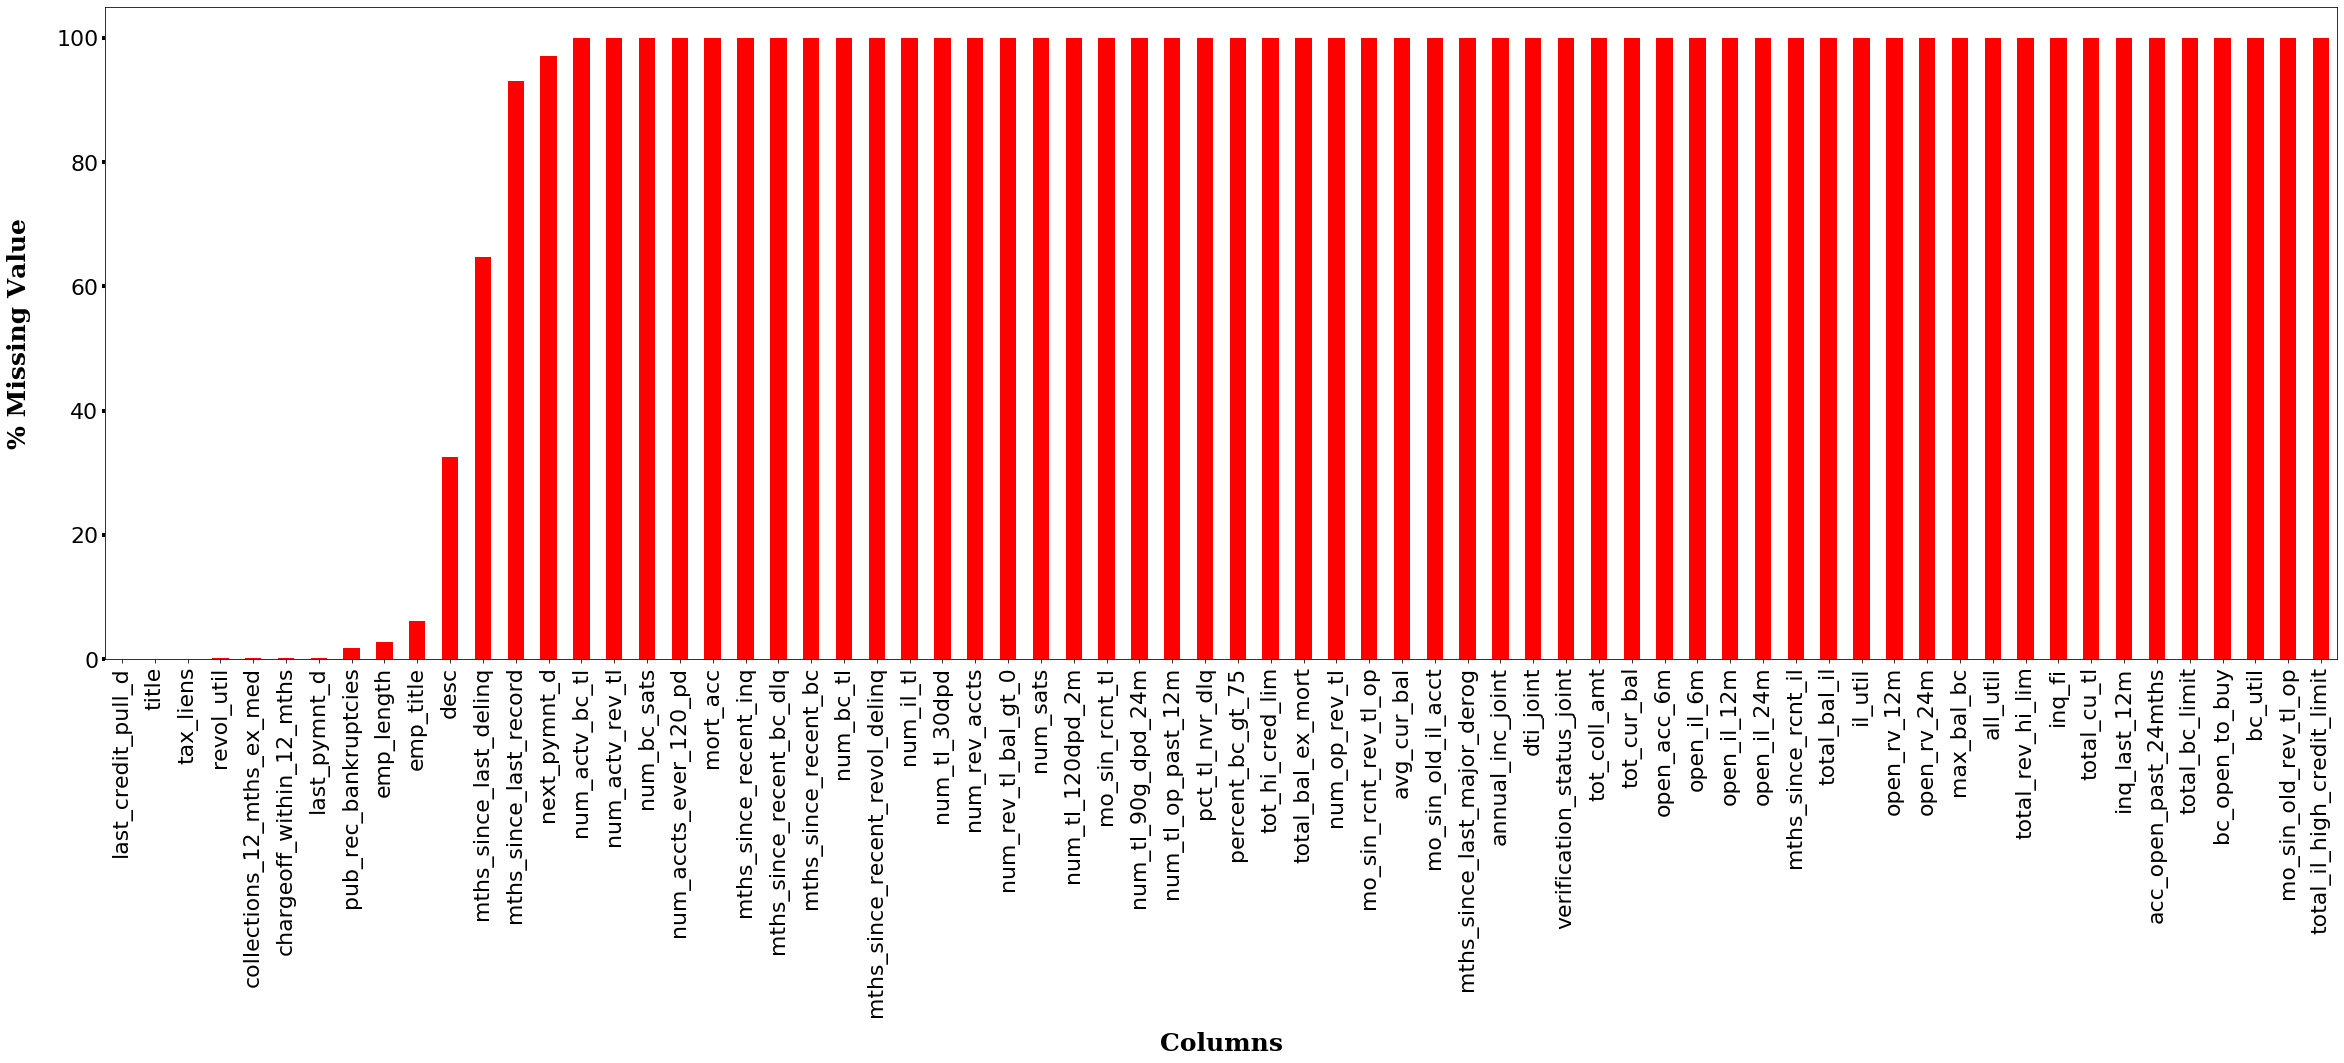

In [4]:
# Get an overview of columns with percentage of missing values

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 25,
            }

fig, axs = plt.subplots(1,1, figsize=(40,12))

cols_with_null_percentage[cols_with_null_percentage>0].sort_values().plot(kind='bar', ax=axs, color='red')

axs.tick_params(axis='y', which='both', labelsize=14, width='4')
# axes.set_xticklabels(dataframe.index, rotation=0, fontdict=font)
axs.set_xlabel("Columns", fontdict = font, labelpad=15)
axs.set_ylabel('% Missing Value',fontdict = font, labelpad=25)
for tick in axs.xaxis.get_major_ticks():
    tick.label.set_fontsize(22) 

for tick in axs.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)

plt.show()

> Drop the columns with 100% missing values

> Save the rectified dataset to __"master_frame"__

In [5]:
master_frame = loan.drop(cols_with_null_percentage[cols_with_null_percentage==100].index.tolist(), axis=1)

> Get the missing value percentage of all the columns

In [6]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

> Remove the columns with __high percentage of missing values__ along with columns with __no statistical significance__ with the output of the variables
- 'id', 'member_id', 'url', 'emp_title', 'title', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'

In [7]:
master_frame = master_frame.drop(['id',
                  'member_id',
                  'url',
                  'emp_title',
                  'title',
                  'desc',
                  'mths_since_last_delinq',
                  'mths_since_last_record',
                  'next_pymnt_d'
                 ], axis=1)

> Get the missing value percentage of all the columns

In [8]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))

loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.13
total_acc                     0.00
initial_list_status           0.00
out_prncp           

> remove rows where below columns contain missing values
- emp_length,
- revol_util, 
- last_pymnt_d, 
- last_credit_pull_d, 
- collections_12_mths_ex_med,
- chargeoff_within_12_mths,
- pub_rec_bankruptcies,
- tax_liens

In [9]:

master_frame = master_frame[~master_frame.emp_length.isnull()]
master_frame = master_frame[(~master_frame.revol_util.isnull())]
master_frame = master_frame[(~master_frame.last_pymnt_d.isnull())]
master_frame = master_frame[(~master_frame.last_credit_pull_d.isnull())]
master_frame = master_frame[(~master_frame.collections_12_mths_ex_med.isnull())]
master_frame = master_frame[(~master_frame.chargeoff_within_12_mths.isnull())]
master_frame = master_frame[(~master_frame.pub_rec_bankruptcies.isnull())]
master_frame = master_frame[(~master_frame.tax_liens.isnull())]

> __Get the percentage of data loss__

In [10]:
# Total percentage of data loss
print(round(100*(len(loan.index)-len(master_frame.index))/len(loan.index),2), "%")

4.74 %


> Get an overview of the dataset

In [11]:
master_frame.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37833 entries, 0 to 39623
Data columns (total 48 columns):
loan_amnt                     37833 non-null int64
funded_amnt                   37833 non-null int64
funded_amnt_inv               37833 non-null float64
term                          37833 non-null object
int_rate                      37833 non-null object
installment                   37833 non-null float64
grade                         37833 non-null object
sub_grade                     37833 non-null object
emp_length                    37833 non-null object
home_ownership                37833 non-null object
annual_inc                    37833 non-null float64
verification_status           37833 non-null object
issue_d                       37833 non-null object
loan_status                   37833 non-null object
pymnt_plan                    37833 non-null object
purpose                       37833 non-null object
zip_code                      37833 non-null object
addr_s


## Data and Datatype correction of columns


In [13]:
# Remove string " months" from "term" and convert the values to integer
master_frame['term'] = master_frame['term'].apply(lambda x: int(x.replace(" months", "")))

In [14]:
# Remove "%" from "int_rate" and convert to float
master_frame['int_rate'] = master_frame['int_rate'].apply(lambda x: float(x.replace("%", "")))

In [15]:
# Convert "grade" column to type "category"
master_frame['grade'] = master_frame['grade'].astype('category')

In [16]:
# Convert "sub_grade" column to type "category"
master_frame['sub_grade'] = master_frame['sub_grade'].astype('category')

In [17]:
# Rectify the "emp_length" and take the numbers
master_frame['emp_length'] = master_frame['emp_length'].apply(lambda x: x.replace("< 1 year", "0")) \
                                                        .apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [18]:
# Convert "home_ownership" column to type "category"
master_frame['home_ownership'] = master_frame['home_ownership'].astype('category')

In [19]:
# Convert "verification_status" column to type "category"
master_frame['verification_status'] = master_frame['verification_status'].astype('category')

In [20]:
# Convert "issue_d" to datetime column
master_frame['issue_d'] = master_frame['issue_d'].apply(lambda x: dt.strptime(x, "%b-%y"))

In [21]:
# Convert "loan_status" column to type "category"
master_frame['loan_status'] = master_frame['loan_status'].astype('category')

In [22]:
print(master_frame.pymnt_plan.value_counts())

n    37833
Name: pymnt_plan, dtype: int64


In [23]:
# We can see that all the values are constant. So we can drop the column
master_frame = master_frame.drop(['pymnt_plan'],axis=1)

In [24]:
# Convert "purpose" column to type "category"
master_frame['purpose'] = master_frame['purpose'].astype('category')

In [25]:
master_frame.zip_code.describe()

count     37833
unique      808
top       100xx
freq        563
Name: zip_code, dtype: object

In [26]:
# zip_code has a high cardinality: 808 distinct values
# remove the column
master_frame = master_frame.drop(['zip_code'],axis=1)

In [27]:
# Convert "addr_state" column to type "category"
master_frame['addr_state'] = master_frame['addr_state'].astype('category')

In [28]:
# Convert "earliest_cr_line" to datetime column
master_frame['earliest_cr_line'] = master_frame['earliest_cr_line'].apply(lambda x: dt.strptime(x, "%b-%y"))

In [29]:
# Remove "%" from "revol_util" and convert to float
master_frame['revol_util'] = master_frame['revol_util'].apply(lambda x: float(x.replace("%", "")))

In [30]:
master_frame.initial_list_status.value_counts()

f    37833
Name: initial_list_status, dtype: int64

In [31]:
# We can see that all the values are constant. So we can drop the column
master_frame = master_frame.drop(['initial_list_status'],axis=1)

In [32]:
# Convert "last_pymnt_d" to datetime column
master_frame['last_pymnt_d'] = master_frame['last_pymnt_d'].apply(lambda x: dt.strptime(x, "%b-%y"))

In [33]:
# Convert "last_credit_pull_d" to datetime column
master_frame['last_credit_pull_d'] = master_frame['last_credit_pull_d'].apply(lambda x: dt.strptime(x, "%b-%y"))

In [34]:
master_frame.application_type.value_counts()

INDIVIDUAL    37833
Name: application_type, dtype: int64

In [35]:
# We can see that all the values are constant. So we can drop the column
master_frame = master_frame.drop(['application_type'],axis=1)

> __Get an overview of the rectified dataframe__

In [36]:
master_frame.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,3.783300e+04,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.0,37833.0,37833.0,37833.0,37833.0,37833.000000,37833.0
mean,11328.432850,11050.379298,10618.633205,42.557450,12.071043,327.140176,4.997965,6.967264e+04,13.377326,0.145825,0.866730,9.325166,0.053657,13480.463986,49.127974,22.199508,52.324677,52.075613,12311.070489,11841.438586,9912.967032,2302.219326,1.334536,94.549679,12.133747,2730.497901,0.0,1.0,0.0,0.0,0.0,0.041445,0.0
std,7477.273405,7204.882109,7112.901058,10.694937,3.734527,209.085202,3.557969,6.364464e+04,6.656071,0.490513,1.066439,4.375355,0.234651,15877.536741,28.278011,11.382747,380.528808,379.137792,9083.447035,8947.074408,7089.451789,2633.844276,7.179094,690.395333,148.113071,4489.669315,0.0,0.0,0.0,0.0,0.0,0.200247,0.0
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5600.000000,5500.000000,5000.000000,36.000000,9.320000,168.760000,2.000000,4.190000e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3791.000000,25.800000,14.000000,0.000000,0.000000,5647.319201,5387.750000,4800.000000,677.120000,0.000000,0.000000,0.000000,224.770000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,10000.000000,9200.000000,36.000000,11.860000,283.200000,4.000000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8978.000000,49.700000,21.000000,0.000000,0.000000,10072.214160,9611.390000,8000.010000,1376.240000,0.000000,0.000000,0.000000,563.430000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14603.062290,60.000000,14.610000,434.750000,9.000000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17184.000000,72.600000,29.000000,0.000000,0.000000,16717.654240,16108.820000,14000.000000,2889.120000,0.000000,0.000000,0.000000,3401.330000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [37]:
# Removing columns with constant values
master_frame = master_frame.drop(['collections_12_mths_ex_med',
                  'policy_code',
                  'acc_now_delinq',
                  'chargeoff_within_12_mths',
                  'delinq_amnt',
                  'tax_liens'], axis=1)

In [38]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37833 entries, 0 to 39623
Data columns (total 38 columns):
loan_amnt                  37833 non-null int64
funded_amnt                37833 non-null int64
funded_amnt_inv            37833 non-null float64
term                       37833 non-null int64
int_rate                   37833 non-null float64
installment                37833 non-null float64
grade                      37833 non-null category
sub_grade                  37833 non-null category
emp_length                 37833 non-null int64
home_ownership             37833 non-null category
annual_inc                 37833 non-null float64
verification_status        37833 non-null category
issue_d                    37833 non-null datetime64[ns]
loan_status                37833 non-null category
purpose                    37833 non-null category
addr_state                 37833 non-null category
dti                        37833 non-null float64
delinq_2yrs                37833 no

In [39]:
master_frame.loan_status.value_counts()

Fully Paid     31533
Charged Off     5202
Current         1098
Name: loan_status, dtype: int64

> __Loan Status is the output column__

> In order to find correlation with this column we have encoded to values and store in a new variable __loan_status_encoded__

In [40]:
lb_make = LabelEncoder()
master_frame['loan_status_encoded'] = lb_make.fit_transform(master_frame['loan_status']) 

## Analysis of Columns

> Two functions created to generate frequency table and univariate analysis of the columns
- generate_freq_table
- plot_pie_char_bar_plot_categorical

In [41]:
def generate_freq_table(data_series):
    count = data_series.value_counts()
    percent = data_series.value_counts(normalize=True).mul(100).round(2)
    return pd.DataFrame({'count': count, 'percent': percent})

In [42]:
def plot_pie_char_bar_plot_categorical(dataframe, pie_xlabel, bar_xlabel):
    
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

    currency_format = mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ','))

    fig, axes = plt.subplots(1,2, figsize=(40,12))


    with plt.rc_context({'font.weight':'bold'}):

        patches, texts, autotexts = axes[0].pie(dataframe['count'],
                                                        labels=dataframe.index, 
                                                        autopct='%1.1f%%',
                                                        shadow=True, 
                                                        startangle=45, 
                                                        textprops={'color':"black"})
        
        [ _.set_fontsize(15) for _ in texts ]
        [ _.set_fontsize(15) for _ in autotexts ]

        axes[0].set_xlabel(pie_xlabel, fontdict = font, labelpad=15)
        
        cmap = mpl.cm.get_cmap('jet')
        colors = cmap(dataframe['percent'].values/100)

        ax2 = dataframe['count'].plot(
                                    kind="bar",
                                    figsize=(18,9),
                                    fontsize = 10, 
                                    ax=axes[1], 
#                                     color='#2B7BDE',
                                    color=colors
                                    )
        ax2.tick_params(axis='y', which='both', labelsize=14, width='4')
        ax2.set_xticklabels(dataframe.index, rotation=0, fontdict=font)
        ax2.set_xlabel(bar_xlabel, fontdict = font, labelpad=15)
        ax2.set_ylabel('Count',fontdict = font, labelpad=25)
    
    fig.tight_layout(pad=8.0)
    plt.show()

### Remove Outliers

> If we consider __"Annual Income of Loan Borrowers"__ The spread of the data in not normally distributed. Let's see the distribution of the data

In [43]:
master_frame.annual_inc.describe()

count    3.783300e+04
mean     6.967264e+04
std      6.364464e+04
min      4.000000e+03
25%      4.190000e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

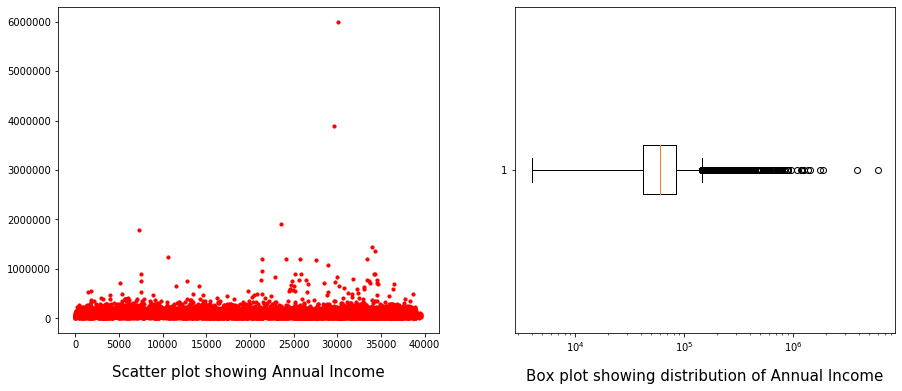

In [44]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].scatter(master_frame.index,
                master_frame.annual_inc,
                s=10,
                c='r')
axes[0].set_xlabel('Scatter plot showing Annual Income', fontdict={'size':15}, labelpad=15)

axes[1].boxplot(master_frame.annual_inc, vert=False, showbox=True)
axes[1].set_xlabel('Box plot showing distribution of Annual Income', fontdict={'size':15}, labelpad=15)
axes[1].set_xscale('log')
plt.show()

> We have cosidered to remove values above __99th percentile__ to in order to refine the data

> Let's visualise the data before actual removal

Annual Income threshold point: 235000.0
Number of outliers: 383


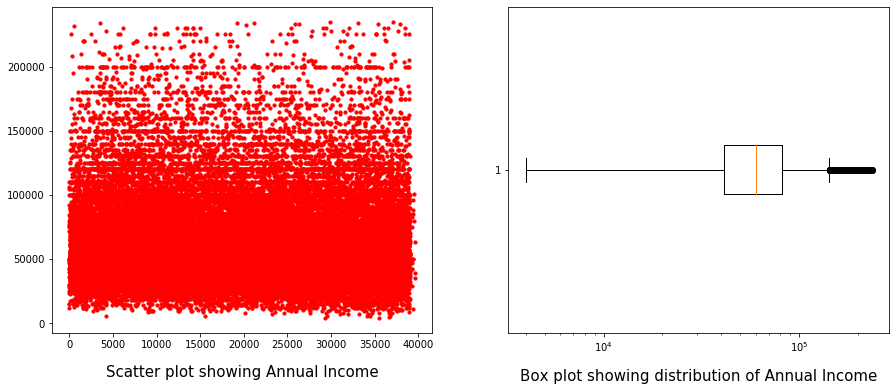

In [45]:
annual_inc_threshold = np.percentile(master_frame.annual_inc, [99])[0]

print("Annual Income threshold point:",annual_inc_threshold)
print("Number of outliers:", len(master_frame[master_frame.annual_inc>=annual_inc_threshold].index))

fig, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].scatter(master_frame[master_frame.annual_inc<annual_inc_threshold].index,
                master_frame[master_frame.annual_inc<annual_inc_threshold].annual_inc,
                s=10,
                c='r')
axes[0].set_xlabel('Scatter plot showing Annual Income', fontdict={'size':15}, labelpad=15)

axes[1].boxplot(master_frame[master_frame.annual_inc<annual_inc_threshold].annual_inc, vert=False, showbox=True)
axes[1].set_xlabel('Box plot showing distribution of Annual Income', fontdict={'size':15}, labelpad=15)
axes[1].set_xscale('log')
plt.show()

> Perform outlier removal operation

In [46]:
master_frame = master_frame[master_frame.annual_inc<annual_inc_threshold]

> If we consider __"Total credit revolving balance"__ The spread of the data in not normally distributed. Let's see the distribution of the data

In [47]:
master_frame.revol_bal.describe()

count     37450.000000
mean      13260.744993
std       15435.441481
min           0.000000
25%        3765.250000
50%        8921.500000
75%       17025.250000
max      149588.000000
Name: revol_bal, dtype: float64

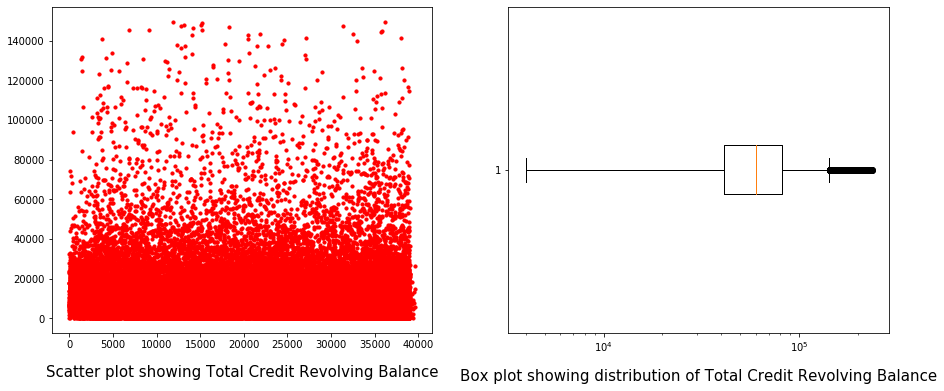

In [48]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].scatter(master_frame.index,
                master_frame.revol_bal,
                s=10,
                c='r')
axes[0].set_xlabel('Scatter plot showing Total Credit Revolving Balance', fontdict={'size':15}, labelpad=15)

axes[1].boxplot(master_frame.annual_inc, vert=False, showbox=True)
axes[1].set_xlabel('Box plot showing distribution of Total Credit Revolving Balance', fontdict={'size':15}, labelpad=15)
axes[1].set_xscale('log')
plt.show()

> We have cosidered to remove values above __99th percentile__ to in order to refine the data

> Let's visualise the data before actual removal

Total Credit Revolving Balance threshold point: 79791.60000000012
Number of outliers: 375


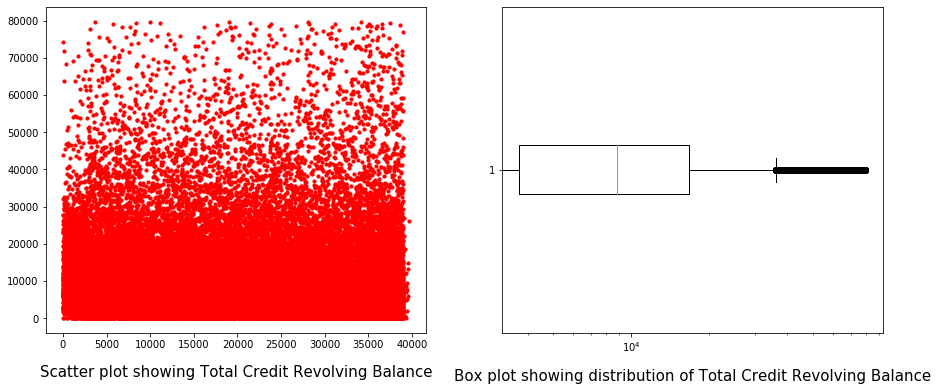

In [49]:
revol_bal_threshold = np.percentile(master_frame.revol_bal, [99])[0]

print("Total Credit Revolving Balance threshold point:",revol_bal_threshold)
print("Number of outliers:", len(master_frame[master_frame.revol_bal>=revol_bal_threshold].index))

fig, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].scatter(master_frame[master_frame.revol_bal<revol_bal_threshold].index,
                master_frame[master_frame.revol_bal<revol_bal_threshold].revol_bal,
                s=10,
                c='r')
axes[0].set_xlabel('Scatter plot showing Total Credit Revolving Balance', fontdict={'size':15}, labelpad=15)

axes[1].boxplot(master_frame[master_frame.revol_bal<revol_bal_threshold].revol_bal, vert=False, showbox=True)
axes[1].set_xlabel('Box plot showing distribution of Total Credit Revolving Balance', fontdict={'size':15}, labelpad=15)
axes[1].set_xscale('log')
plt.show()

> Perform outlier removal operation

In [50]:
master_frame = master_frame[master_frame.revol_bal<revol_bal_threshold]

> __Get total percentage of data loss__

In [51]:
# Total percentage of data loss
print(round(100*(len(loan.index)-len(master_frame.index))/len(loan.index),2), "%")

6.65 %


## Analysis on columns 

### Create a list which will store the list of columns which can be used as driving factors for analysis

In [52]:
feature_columns = []

### Column  "loan_amnt"

Loan Amount Data Overview
count    37075.000000
mean     11187.766015
std       7358.450678
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


Interest Bins
[  465.5 12000.  23500.  35000. ]


Loan Amount Categorical Overview
        count  percent
Low     24402    65.82
Medium   9355    25.23
High     3318     8.95


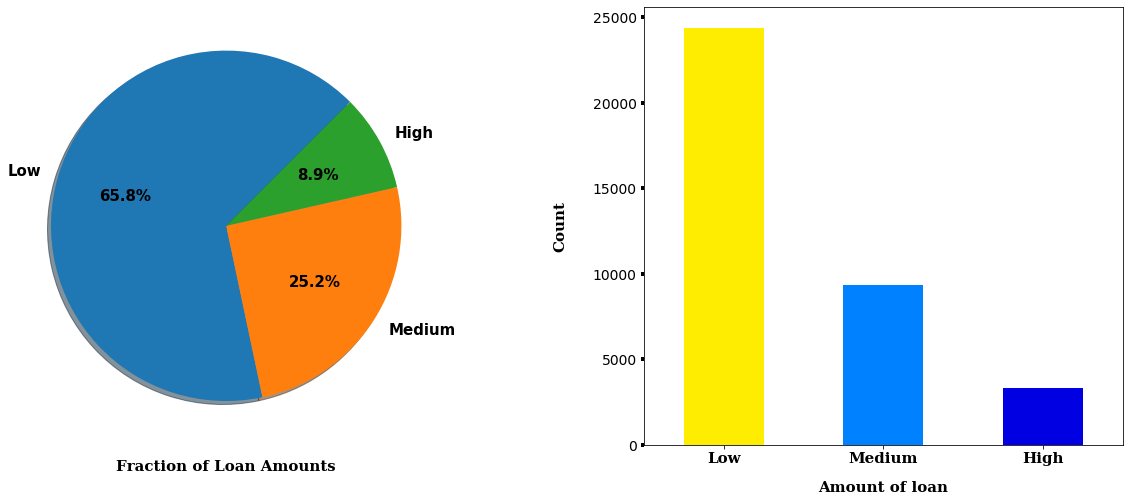

In [53]:
# For laon_amnt
print("Loan Amount Data Overview\n"+20*"==")
print(master_frame.loan_amnt.describe())

master_frame['loan_amnt_cat'], loan_amnt_bins = pd.cut(master_frame['loan_amnt'], 3, labels=['Low', 'Medium', 'High'], retbins=True)

print("\n\nInterest Bins")
print(loan_amnt_bins)

loan_amount_category_freq = generate_freq_table(master_frame.loan_amnt_cat)
print("\n\nLoan Amount Categorical Overview\n"+20*"==")
print(loan_amount_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(loan_amount_category_freq, 
                                   pie_xlabel = "Fraction of Loan Amounts",
                                   bar_xlabel = "Amount of loan"
                                   )

> From the above analysis we can say that:
   - Below 12000 loan amount there are __65.8%__ data present (Low)
   - Between 12000 and 23500 there are __25.2%__ data present  (Medium)
   - Above 23500 loan amount __8.9%__ data present (High)

### Column "funded_amnt"

Funded Amount Data Overview
count    37075.000000
mean     10917.503034
std       7091.566597
min        500.000000
25%       5500.000000
50%       9700.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


Funded Amount Categorical Overview
        count  percent
Low     24771    66.81
Medium   9487    25.59
High     2817     7.60


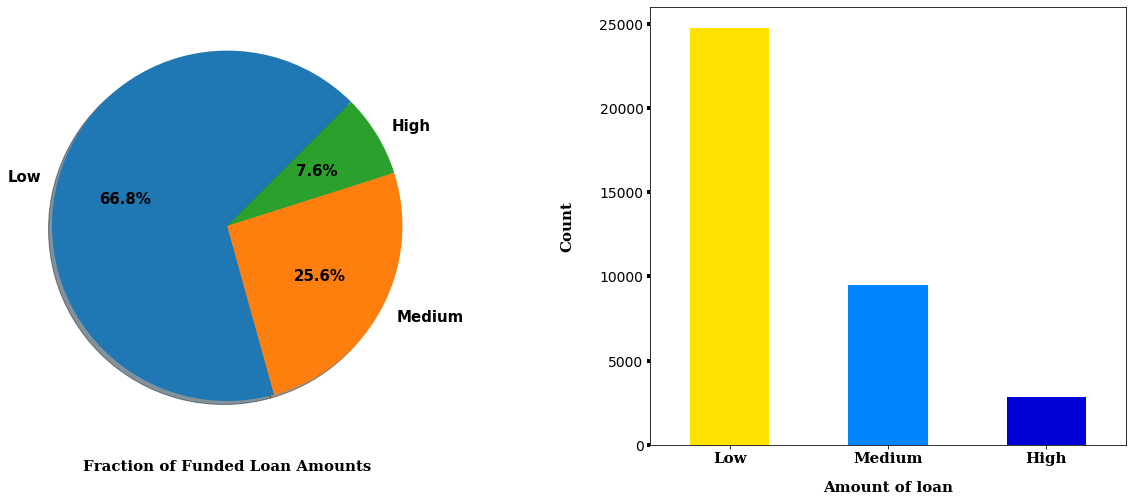

In [54]:
# For funded_amnt
print("Funded Amount Data Overview\n"+20*"==")
print(master_frame.funded_amnt.describe())

master_frame['funded_amnt_cat'] = pd.cut(master_frame['funded_amnt'], 3, labels=['Low', 'Medium', 'High'])

funded_amount_category_freq = generate_freq_table(master_frame.funded_amnt_cat)
print("\n\nFunded Amount Categorical Overview\n"+20*"==")
print(funded_amount_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(funded_amount_category_freq, 
                                   pie_xlabel = "Fraction of Funded Loan Amounts",
                                   bar_xlabel = "Amount of loan"
                                   )

### Column funded_amnt_inv

Funded Amount Inv Data Overview
count    37075.000000
mean     10492.817440
std       7002.379487
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


Funded Amount Inv Categorical Overview
        count  percent
Low     23394    63.10
Medium  11139    30.04
High     2542     6.86


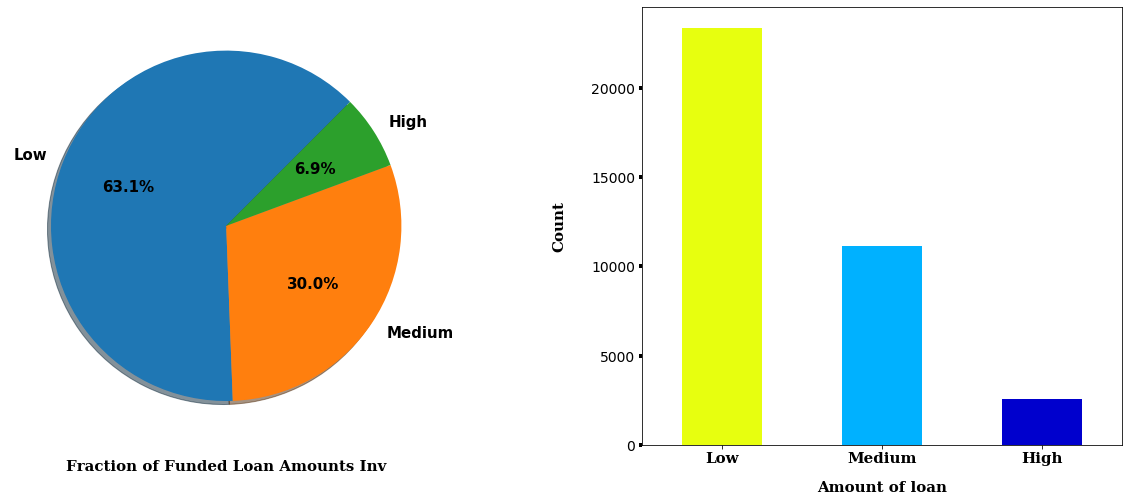

In [55]:
# For funded_amnt_inv
print("Funded Amount Inv Data Overview\n"+20*"==")
print(master_frame.funded_amnt_inv.describe())

master_frame['funded_amnt_inv_cat'] = pd.cut(master_frame['funded_amnt_inv'], 3, labels=['Low', 'Medium', 'High'])

funded_amount_inv_category_freq = generate_freq_table(master_frame.funded_amnt_inv_cat)
print("\n\nFunded Amount Inv Categorical Overview\n"+20*"==")
print(funded_amount_inv_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(funded_amount_inv_category_freq, 
                                   pie_xlabel = "Fraction of Funded Loan Amounts Inv",
                                   bar_xlabel = "Amount of loan"
                                   )

> Considering the above __3 columns__ we can see that the values are __highly correlated with each other.__ Let's see the result by ploting a correlation plot of these 3 variables

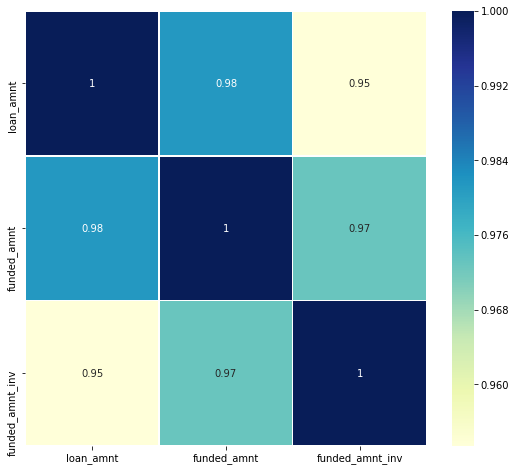

In [56]:
corrmat = master_frame[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()


f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corrmat.style.background_gradient(cmap=cm).set_precision(2)
plt.show()

> We can observe that there is very high correlation between these 3 variables.

> Removing __"funded_amnt"__ and __"funded_amnt_inv"__ columns and their corresponding Categorical columns

In [57]:
master_frame = master_frame.drop(['funded_amnt', 'funded_amnt_inv', 'funded_amnt_cat', 'funded_amnt_inv_cat'], axis=1)

> Simililarly let's plot correlation on the entire dataframe. We can have an insight on the overall dataframe.

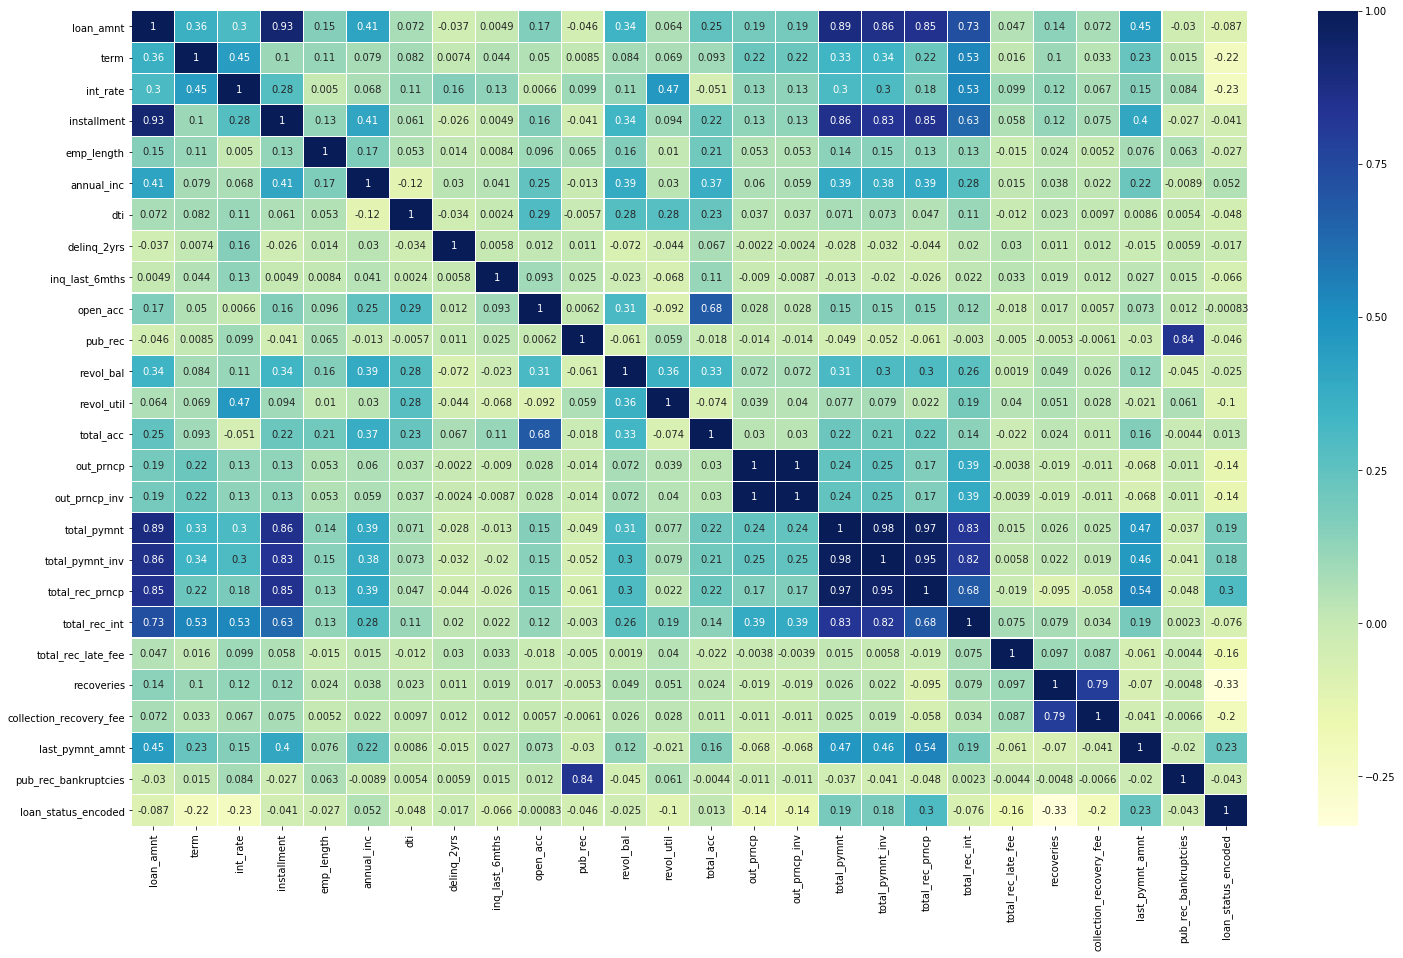

In [58]:
corrmat = master_frame.corr()


f, ax = plt.subplots(figsize =(25, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corrmat.style.background_gradient(cmap=cm).set_precision(2)
plt.show()

> We if observe the above correlation between variables we have below observations:
 - Due to high correlation with __"total_pymnt"__ we can remove __"total_pymnt_inv"__
 - Due to high correlation with __"total_pymnt"__ we can remove __"total_rec_prncp"__
 - Due to high correlation with __"out_prncp"__ we can remove __"out_prncp_inv"__
    

In [59]:
master_frame = master_frame.drop(['total_pymnt_inv', 'total_rec_prncp', 'out_prncp_inv'], axis=1)

> We are deciding the driving factors of an account being __"Charged Off"__. We have already added a new encoded column __loan_status_encoded__ in the dataframe using the values of __loan_status__ where 
 - Charged Off = 0
 - Current     = 1
 - Fully Paid  = 2
 
 > If we observe the correlation between __"loan_amnt"__ and __"installment"__ values are highly correlated in the dataset. As installment can be driving factor of account being __charged off__ we need to observe how below 3 variables correlates 
 - loan_amnt
 - installment
 - loan_status_encoded
 

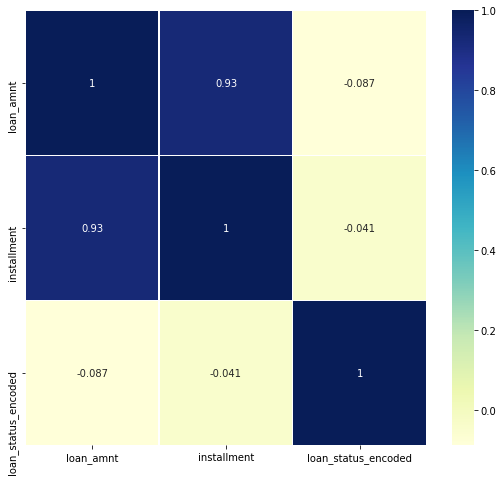

In [60]:
corr = master_frame[['loan_amnt','installment', 'loan_status_encoded']].corr()


f, axes = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr, ax = axes, cmap ="YlGnBu", linewidths = 0.1, annot=True) 
plt.show()

> If we observe the behaviour of the 3 variables it can be seen that both __loan_amnt__ and __installment__ are acting similarly against __loan_status_encoded__

> So, we can drop __installment__ column from the dataset


In [61]:
master_frame = master_frame.drop(['installment'], axis=1)

### Column "loan_amnt"

In [62]:
# For loan_amnt

loan_status_with_loan_amnt = master_frame[["loan_amnt_cat","loan_status"]].groupby(["loan_amnt_cat","loan_status"]).size().reset_index(name="count").sort_values("loan_amnt_cat")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_loan_amnt = loan_status_with_loan_amnt.assign(percentage = loan_status_with_loan_amnt[['count','loan_amnt_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/loan_amount_category_freq.loc[x['loan_amnt_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_loan_amnt)

  loan_amnt_cat  loan_status  count  percentage
0           Low  Charged Off   3079       12.62
1           Low      Current    340        1.39
2           Low   Fully Paid  20983       85.99
3        Medium  Charged Off   1412       15.09
4        Medium      Current    479        5.12
5        Medium   Fully Paid   7464       79.79
6          High  Charged Off    623       18.78
7          High      Current    258        7.78
8          High   Fully Paid   2437       73.45


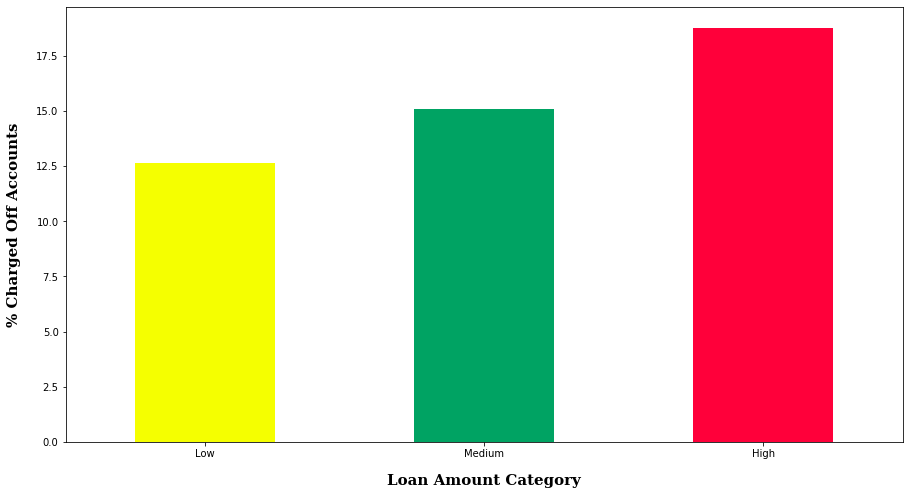

In [63]:
charged_off_df = loan_status_with_loan_amnt[loan_status_with_loan_amnt.loan_status=='Charged Off']
charged_off_df = charged_off_df.set_index('loan_amnt_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('prism')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Loan Amount Category", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)


plt.show()

> We can say that as the loan amount increases the tendency of an account being charged off increases

In [64]:
feature_columns.append('loan_amnt') # Added as feature column

### Column "term"



Loan Term Overview
    count  percent
36  26976    72.76
60  10099    27.24


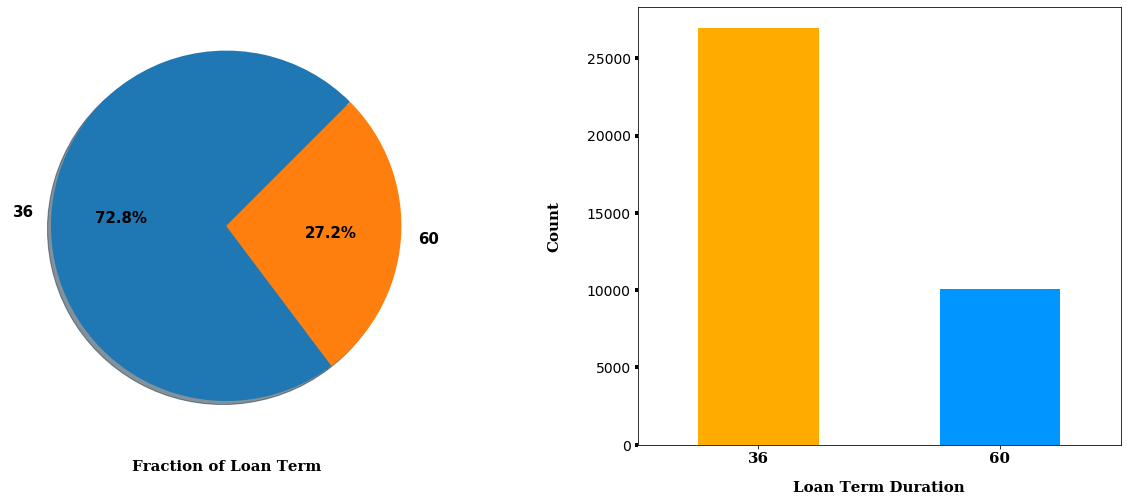

In [65]:
# For term
loan_term_freq = generate_freq_table(master_frame.term)
print("\n\nLoan Term Overview\n"+20*"==")
print(loan_term_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(loan_term_freq, 
                                   pie_xlabel = "Fraction of Loan Term",
                                   bar_xlabel = "Loan Term Duration"
                                   )

> There are two types of loan terms present in the dataset __"36 Months"__ and __"60 Months"__

> Let's observe how loan terms affects the behavior of account being __"Charged Off"__

In [66]:
loan_status_with_term = master_frame[["term","loan_status"]].groupby(["term","loan_status"]).size().reset_index(name="count")

# Create a new column which stores percentage of account 
loan_status_with_term = loan_status_with_term.assign(percentage = loan_status_with_term[['count','term']].apply(lambda x: 
                                                                                                                    round(100*x['count']/loan_term_freq.loc[x['term'], 'count'],2), 
                                                                                                                    axis=1))

In [67]:
print(loan_status_with_term)

   term  loan_status  count  percentage
0    36  Charged Off   2842       10.54
1    36   Fully Paid  24134       89.46
2    60  Charged Off   2272       22.50
3    60      Current   1077       10.66
4    60   Fully Paid   6750       66.84


> If we observe the above result we can see that for __36 Months__ Term __"10.54%"__ accounts are being __"Charged Off"__. Where as for __60 Months__ Term __"22.50%"__ accounts are being __"Charged Off"__.

> __We can say that people are likely to repay loan if the length of the term is small__

In [68]:
feature_columns.append('term') # Added as feature column

### Column "int_rate"

Interest Rate Data Overview
count    37075.000000
mean        12.053245
std          3.725054
min          5.420000
25%          9.250000
50%         11.860000
75%         14.610000
max         24.590000
Name: int_rate, dtype: float64


Interest Bins
[ 5.40083 11.81    18.2     24.59   ]


Interest Categorical Overview
                count  percent
(5.401, 11.81]  18087    48.78
(11.81, 18.2]   16674    44.97
(18.2, 24.59]    2314     6.24


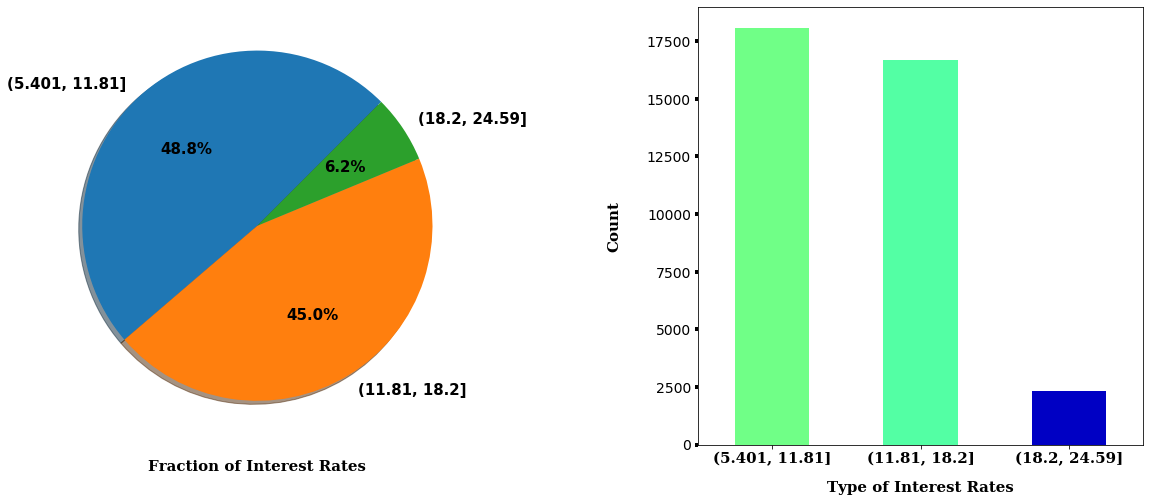

In [69]:
# For int_rate
print("Interest Rate Data Overview\n"+20*"==")
print(master_frame.int_rate.describe())

master_frame['int_rate_cat'], interest_bins = pd.cut(master_frame['int_rate'], 
                                                         3, 
#                                                          labels=['Low', 'Medium', 'High'], 
                                                         retbins=True
                                                    )

print("\n\nInterest Bins")
print(interest_bins)

int_rate_category_freq = generate_freq_table(master_frame.int_rate_cat)
print("\n\nInterest Categorical Overview\n"+20*"==")
print(int_rate_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(int_rate_category_freq, 
                                   pie_xlabel = "Fraction of Interest Rates",
                                   bar_xlabel = "Type of Interest Rates"
                                   )

> Let's analyse the interest rate and check how this affects an account being charged off

In [70]:
loan_status_with_interest_rate = master_frame[["int_rate_cat","loan_status"]].groupby(["int_rate_cat","loan_status"]).size().reset_index(name="count").sort_values("int_rate_cat")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_interest_rate = loan_status_with_interest_rate.assign(percentage = loan_status_with_interest_rate[['count','int_rate_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/int_rate_category_freq.loc[x['int_rate_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_interest_rate)

     int_rate_cat  loan_status  count  percentage
0  (5.401, 11.81]  Charged Off   1505        8.32
1  (5.401, 11.81]      Current    237        1.31
2  (5.401, 11.81]   Fully Paid  16345       90.37
3   (11.81, 18.2]  Charged Off   2921       17.52
4   (11.81, 18.2]      Current    585        3.51
5   (11.81, 18.2]   Fully Paid  13168       78.97
6   (18.2, 24.59]  Charged Off    688       29.73
7   (18.2, 24.59]      Current    255       11.02
8   (18.2, 24.59]   Fully Paid   1371       59.25


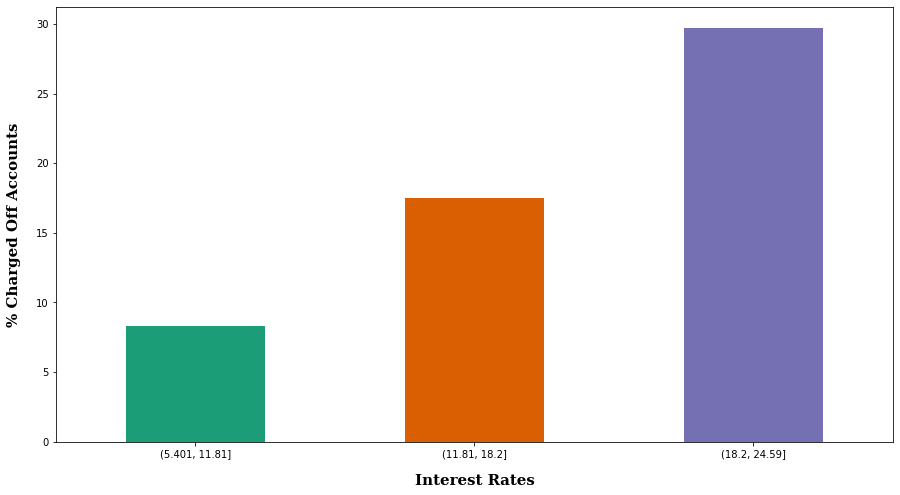

In [71]:
charged_off_df = loan_status_with_interest_rate[loan_status_with_interest_rate.loan_status=='Charged Off']
charged_off_df = charged_off_df.set_index('int_rate_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('Dark2')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Interest Rates", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)


plt.show()

> The above plot clearly indicates that with increase in __"Interest Rates"__ the rate of accounts getting __"charged off"__ increases

In [72]:
feature_columns.append('int_rate') # Added as feature column

### Column "grade"



Borrower's Loan Grade Overview
   count  percent
B  11268    30.39
A   9388    25.32
C   7553    20.37
D   4943    13.33
E   2658     7.17
F    974     2.63
G    291     0.78


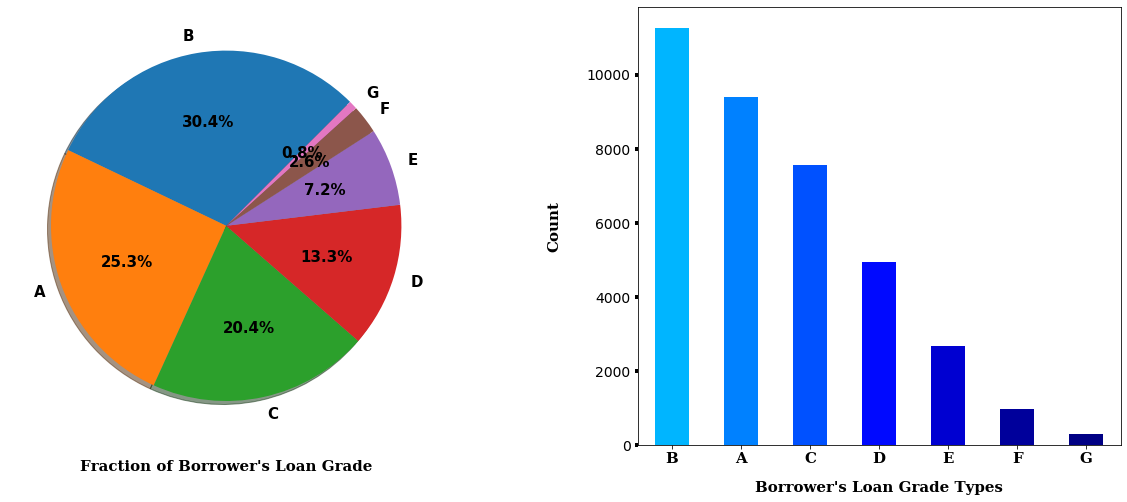

In [73]:
# For grade
grade_freq = generate_freq_table(master_frame.grade)
print("\n\nBorrower's Loan Grade Overview\n"+20*"==")
print(grade_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(grade_freq, 
                                   pie_xlabel = "Fraction of Borrower's Loan Grade",
                                   bar_xlabel = "Borrower's Loan Grade Types"
                                   )

> Let's analyse Borrower's Loan Grade and check how credit history of one customers affects the account being charged off

In [74]:
loan_status_with_grade = master_frame[["grade","loan_status"]].groupby(["grade","loan_status"]).size().reset_index(name="count").sort_values("grade")

# Create a new column which stores percentage of account 
loan_status_with_grade = loan_status_with_grade.assign(percentage = loan_status_with_grade[['count','grade']].apply(lambda x: 
                                                                                                                    round(100*x['count']/grade_freq.loc[x['grade'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_grade)

   grade  loan_status  count  percentage
0      A  Charged Off    539        5.74
1      A      Current     35        0.37
2      A   Fully Paid   8814       93.89
3      B  Charged Off   1293       11.47
4      B      Current    322        2.86
5      B   Fully Paid   9653       85.67
6      C  Charged Off   1210       16.02
7      C      Current    253        3.35
8      C   Fully Paid   6090       80.63
11     D   Fully Paid   3711       75.08
10     D      Current    210        4.25
9      D  Charged Off   1022       20.68
12     E  Charged Off    664       24.98
13     E      Current    172        6.47
14     E   Fully Paid   1822       68.55
15     F  Charged Off    295       30.29
16     F      Current     68        6.98
17     F   Fully Paid    611       62.73
18     G  Charged Off     91       31.27
19     G      Current     17        5.84
20     G   Fully Paid    183       62.89


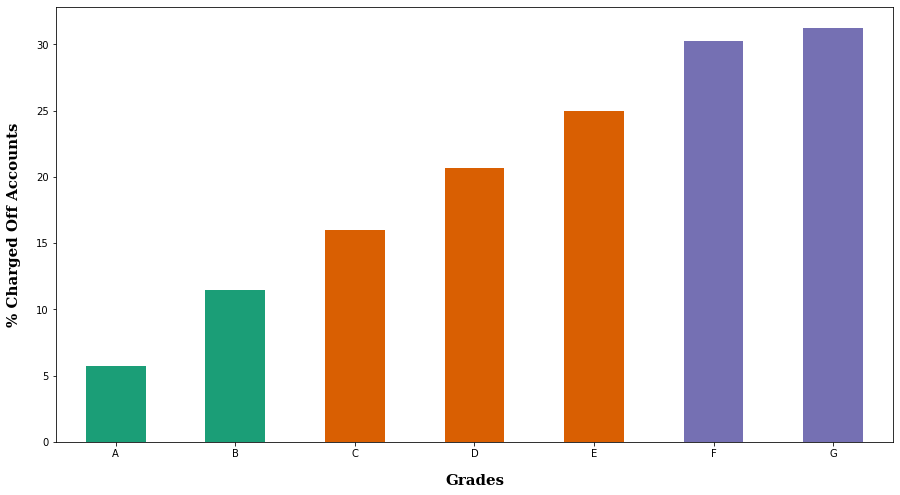

In [75]:
charged_off_df = loan_status_with_grade[loan_status_with_grade.loan_status=='Charged Off']
charged_off_df = charged_off_df.set_index('grade')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('Dark2')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Grades", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)


plt.show()

> The above plot clearly indicates that as the __"Grade of Borrower"__ decreases the rate of accounts getting __"charged off"__ increases

In [76]:
feature_columns.append('grade') # Added as feature column

### Column "sub_grade"

In [77]:
# For sub_grade
sub_grade_freq = generate_freq_table(master_frame.sub_grade)
print("\n\nBorrower's Loan Sub Grade Overview\n"+20*"==")
print(sub_grade_freq)
print(25*"===")




Borrower's Loan Sub Grade Overview
    count  percent
B3   2735     7.38
A4   2723     7.34
A5   2577     6.95
B5   2563     6.91
B4   2376     6.41
C1   1994     5.38
B2   1908     5.15
C2   1898     5.12
B1   1686     4.55
A3   1672     4.51
C3   1416     3.82
A2   1390     3.75
D2   1259     3.40
C4   1149     3.10
C5   1096     2.96
D3   1094     2.95
A1   1026     2.77
D4    916     2.47
D1    860     2.32
D5    814     2.20
E1    724     1.95
E2    615     1.66
E3    515     1.39
E4    426     1.15
E5    378     1.02
F1    309     0.83
F2    231     0.62
F3    173     0.47
F4    155     0.42
F5    106     0.29
G1     95     0.26
G2     72     0.19
G4     51     0.14
G3     47     0.13
G5     26     0.07


In [78]:
loan_status_with_sub_grade = master_frame[["sub_grade","loan_status"]].groupby(["sub_grade","loan_status"]).size().reset_index(name="count").sort_values("sub_grade")

# Create a new column which stores percentage of account 
loan_status_with_sub_grade = loan_status_with_sub_grade.assign(percentage = loan_status_with_sub_grade[['count','sub_grade']].apply(lambda x: 
                                                                                                                    round(100*x['count']/sub_grade_freq.loc[x['sub_grade'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_sub_grade[loan_status_with_sub_grade.loan_status=='Charged Off'].sort_values("percentage"))

   sub_grade  loan_status  count  percentage
0         A1  Charged Off     24        2.34
2         A2  Charged Off     66        4.75
4         A3  Charged Off     83        4.96
6         A4  Charged Off    166        6.10
9         A5  Charged Off    200        7.76
12        B1  Charged Off    144        8.54
15        B2  Charged Off    199       10.43
18        B3  Charged Off    315       11.52
21        B4  Charged Off    299       12.58
24        B5  Charged Off    336       13.11
27        C1  Charged Off    297       14.89
30        C2  Charged Off    292       15.38
36        C4  Charged Off    190       16.54
39        C5  Charged Off    187       17.06
33        C3  Charged Off    244       17.23
42        D1  Charged Off    151       17.56
44        D2  Charged Off    244       19.38
47        D3  Charged Off    233       21.30
62        E3  Charged Off    110       21.36
50        D4  Charged Off    196       21.40
95        G4  Charged Off     12       23.53
59        

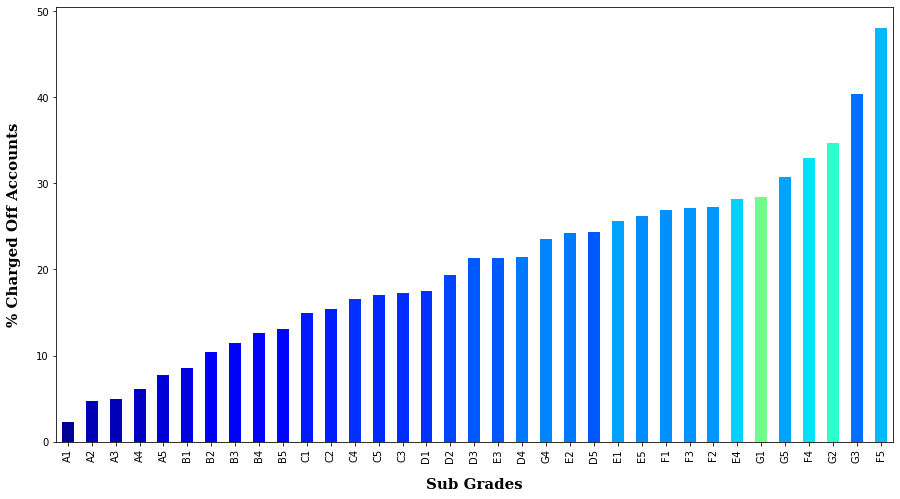

In [79]:
charged_off_df = loan_status_with_sub_grade[loan_status_with_sub_grade.loan_status=='Charged Off']
charged_off_df = charged_off_df.set_index('sub_grade')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('jet')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].sort_values().plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Sub Grades", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=90)


plt.show()

> There is a similar trend present in "sub_grade" as in "grade".

In [80]:
feature_columns.append('sub_grade') # Added as feature column

### Column "emp_length"

Employee Length Data Overview
count    37075.000000
mean         4.972030
std          3.550581
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


Employee Length Bins
IntervalIndex([(0, 3], (4, 7], (7, 10]],
              closed='right',
              dtype='interval[int64]')


Employee Length Categorical Overview
         count  percent
(0, 3]   11267    38.32
(7, 10]  11077    37.68
(4, 7]    7057    24.00


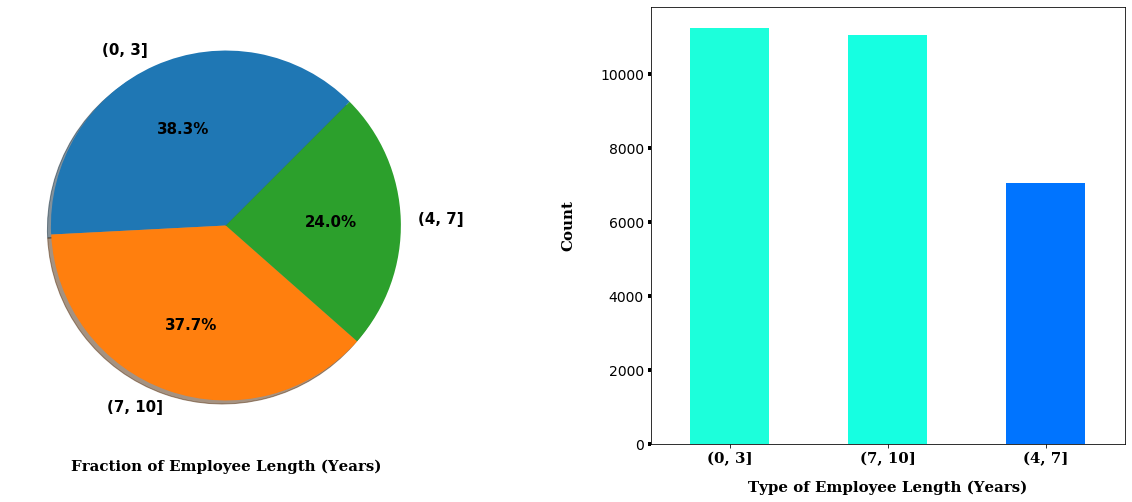

In [81]:
# For emp_length
print("Employee Length Data Overview\n"+20*"==")
print(master_frame.emp_length.describe())

master_frame['emp_length_cat'], interest_bins = pd.cut(master_frame['emp_length'], 
                                                       bins=pd.IntervalIndex.from_tuples([(0, 3), (4, 7), (7, 10)]),
#                                                          labels=['Low', 'Medium', 'High'], 
                                                         retbins=True
                                                    )

print("\n\nEmployee Length Bins")
print(interest_bins)

emp_length_category_freq = generate_freq_table(master_frame.emp_length_cat)
print("\n\nEmployee Length Categorical Overview\n"+20*"==")
print(emp_length_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(emp_length_category_freq, 
                                   pie_xlabel = "Fraction of Employee Length (Years)",
                                   bar_xlabel = "Type of Employee Length (Years)"
                                   )

In [82]:
loan_status_with_emp_length = master_frame[["emp_length_cat","loan_status"]].groupby(["emp_length_cat","loan_status"]).size().reset_index(name="count").sort_values("emp_length_cat")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_emp_length = loan_status_with_emp_length.assign(percentage = loan_status_with_emp_length[['count','emp_length_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/emp_length_category_freq.loc[x['emp_length_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_emp_length)

  emp_length_cat  loan_status  count  percentage
0         (0, 3]  Charged Off   1504       13.35
1         (0, 3]      Current    247        2.19
2         (0, 3]   Fully Paid   9516       84.46
3         (4, 7]  Charged Off    984       13.94
4         (4, 7]      Current    207        2.93
5         (4, 7]   Fully Paid   5866       83.12
6        (7, 10]  Charged Off   1607       14.51
7        (7, 10]      Current    455        4.11
8        (7, 10]   Fully Paid   9015       81.38


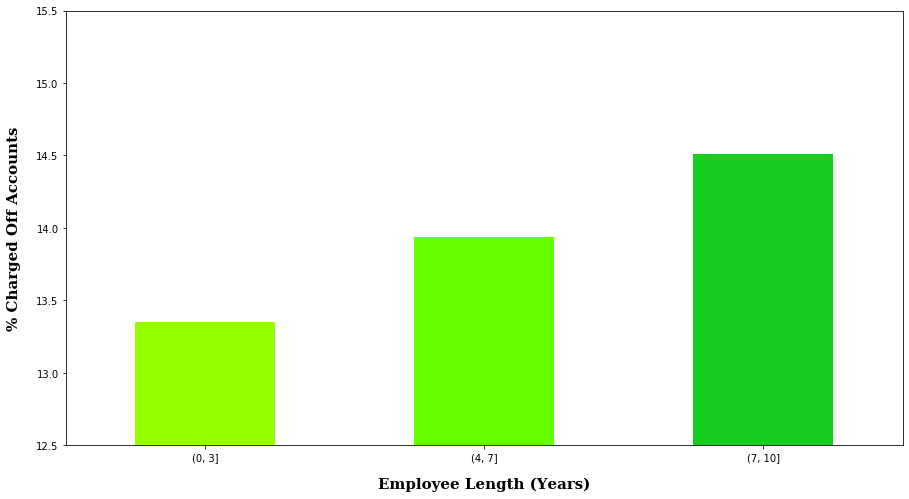

In [83]:
charged_off_df = loan_status_with_emp_length[loan_status_with_emp_length.loan_status=='Charged Off']
charged_off_df = charged_off_df.set_index('emp_length_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('prism')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Employee Length (Years)", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(12.5,15.5)


plt.show()

> Though there is not much diffrence in percnetage of a account being charged off in all the categories, we can still observe an increasing trend. As the length of employment increases an account being charged off increases.

In [84]:
feature_columns.append('emp_length') # Added as feature column

### Column "home_ownership"



Type of Home Ownership Overview
          count  percent
RENT      17925    48.35
MORTGAGE  16341    44.08
OWN        2715     7.32
OTHER        94     0.25


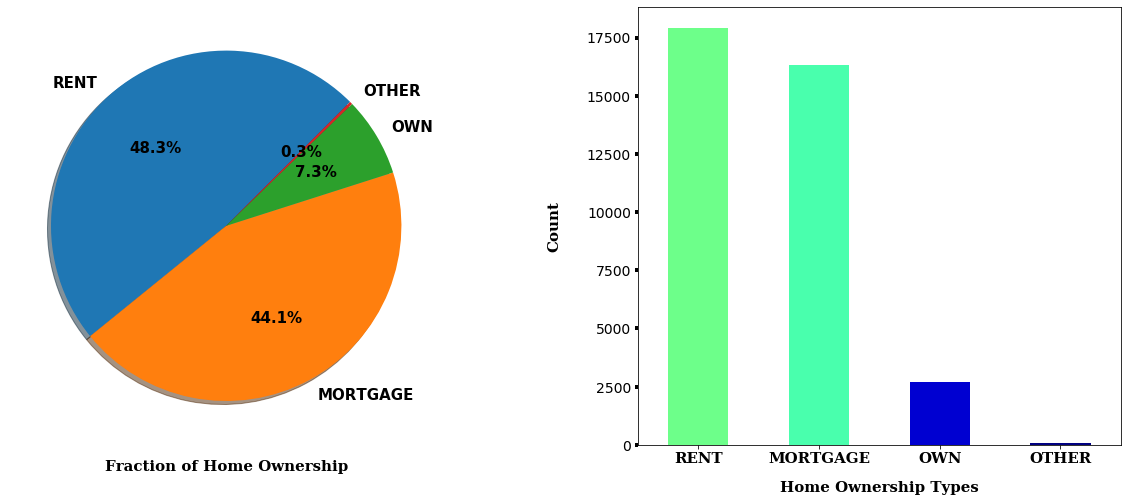

In [85]:
# For home_ownership
home_ownership_freq = generate_freq_table(master_frame.home_ownership)
print("\n\nType of Home Ownership Overview\n"+20*"==")
print(home_ownership_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(home_ownership_freq, 
                                   pie_xlabel = "Fraction of Home Ownership",
                                   bar_xlabel = "Home Ownership Types"
                                   )

In [86]:
loan_status_with_home_type = master_frame[["home_ownership","loan_status"]].groupby(["home_ownership","loan_status"]).size().reset_index(name="count").sort_values("home_ownership")

# Create a new column which stores percentage of account 
loan_status_with_home_type = loan_status_with_home_type.assign(percentage = loan_status_with_home_type[['count','home_ownership']].apply(lambda x: 
                                                                                                                    round(100*x['count']/home_ownership_freq.loc[x['home_ownership'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_home_type)

   home_ownership  loan_status  count  percentage
0        MORTGAGE  Charged Off   2123       12.99
1        MORTGAGE      Current    600        3.67
2        MORTGAGE   Fully Paid  13618       83.34
3           OTHER  Charged Off     18       19.15
4           OTHER   Fully Paid     76       80.85
5             OWN  Charged Off    372       13.70
6             OWN      Current     70        2.58
7             OWN   Fully Paid   2273       83.72
8            RENT  Charged Off   2601       14.51
9            RENT      Current    407        2.27
10           RENT   Fully Paid  14917       83.22


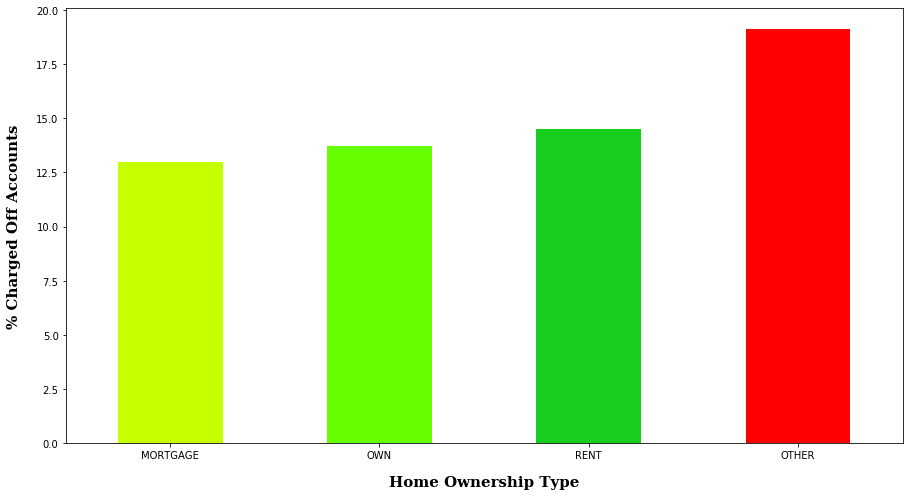

In [87]:
charged_off_df = loan_status_with_home_type[loan_status_with_home_type.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('home_ownership')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('prism')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Home Ownership Type", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)


plt.show()

> We can observe an increasing trend in case of home owership type. So at the time of loan approval we need to keep the below order in mind.

- Mortgage > Own > Rent > Other

In [88]:
feature_columns.append('home_ownership') # Added as feature column

### Column "annual_inc"

Annual Income Data Overview
count     37075.000000
mean      65550.011506
std       34399.981774
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       80500.000000
max      234996.000000
Name: annual_inc, dtype: float64


Annual Income Bins
[  3769.004  61749.    119498.    177247.    234996.   ]


Annual Income Categorical Overview
           count  percent
Low        20435    55.12
Lower-mid  13578    36.62
Medium      2576     6.95
High         486     1.31


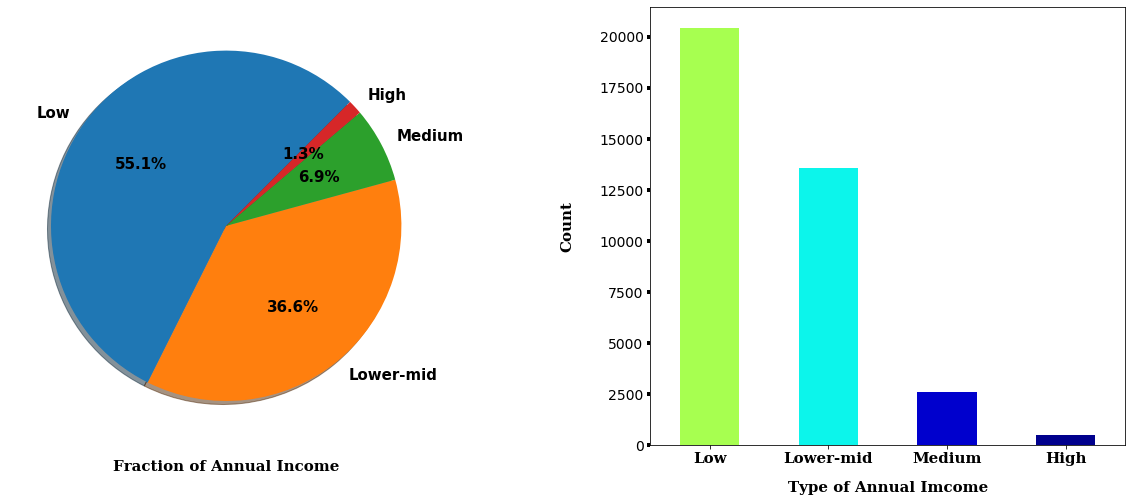

In [89]:
# For annual_inc
print("Annual Income Data Overview\n"+20*"==")
print(master_frame.annual_inc.describe())

master_frame['annual_inc_cat'], annual_inc_bins = pd.cut(master_frame['annual_inc'], 
                                                       4,
                                                         labels=['Low', 'Lower-mid', 'Medium', 'High'], 
                                                         retbins=True
                                                    )

print("\n\nAnnual Income Bins")
print(annual_inc_bins)

annual_inc_category_freq = generate_freq_table(master_frame.annual_inc_cat)
print("\n\nAnnual Income Categorical Overview\n"+20*"==")
print(annual_inc_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(annual_inc_category_freq, 
                                   pie_xlabel = "Fraction of Annual Income",
                                   bar_xlabel = "Type of Annual Imcome"
                                   )

> Below 61749 annual income thereare 55.1% data present.

In [90]:
loan_status_with_annual_inc = master_frame[["annual_inc_cat","loan_status"]].groupby(["annual_inc_cat","loan_status"]).size().reset_index(name="count").sort_values("annual_inc_cat")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_annual_inc = loan_status_with_annual_inc.assign(percentage = loan_status_with_annual_inc[['count','annual_inc_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/annual_inc_category_freq.loc[x['annual_inc_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_annual_inc)

   annual_inc_cat  loan_status  count  percentage
0             Low  Charged Off   3201       15.66
1             Low      Current    500        2.45
2             Low   Fully Paid  16734       81.89
3       Lower-mid  Charged Off   1593       11.73
4       Lower-mid      Current    457        3.37
5       Lower-mid   Fully Paid  11528       84.90
6          Medium  Charged Off    265       10.29
7          Medium      Current    101        3.92
8          Medium   Fully Paid   2210       85.79
9            High  Charged Off     55       11.32
10           High      Current     19        3.91
11           High   Fully Paid    412       84.77


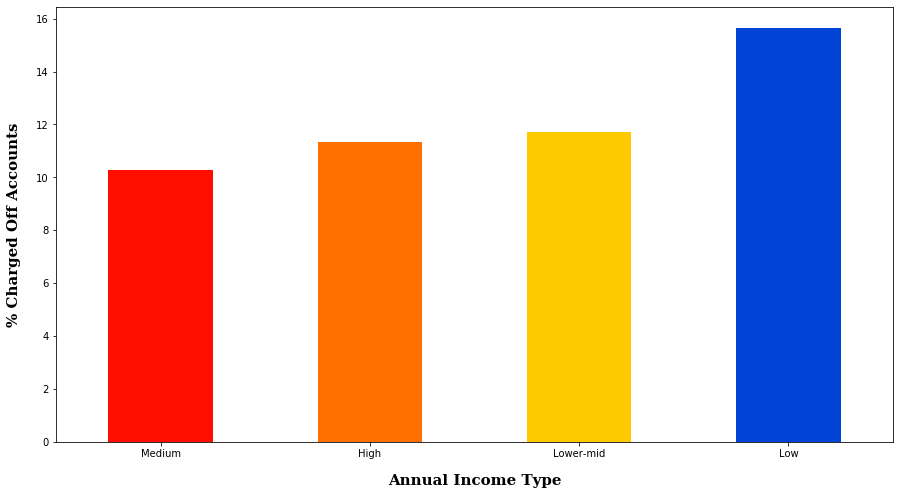

In [91]:
charged_off_df = loan_status_with_annual_inc[loan_status_with_annual_inc.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('annual_inc_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('prism')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Annual Income Type", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)


plt.show()

> __We can say that people with lower income is more likely to get charged off__

In [92]:
feature_columns.append('annual_inc') # Added as feature column

### Column "verification_status"



Type of Verification Status Overview
                 count  percent
Not Verified     15572    42.00
Verified         11929    32.18
Source Verified   9574    25.82


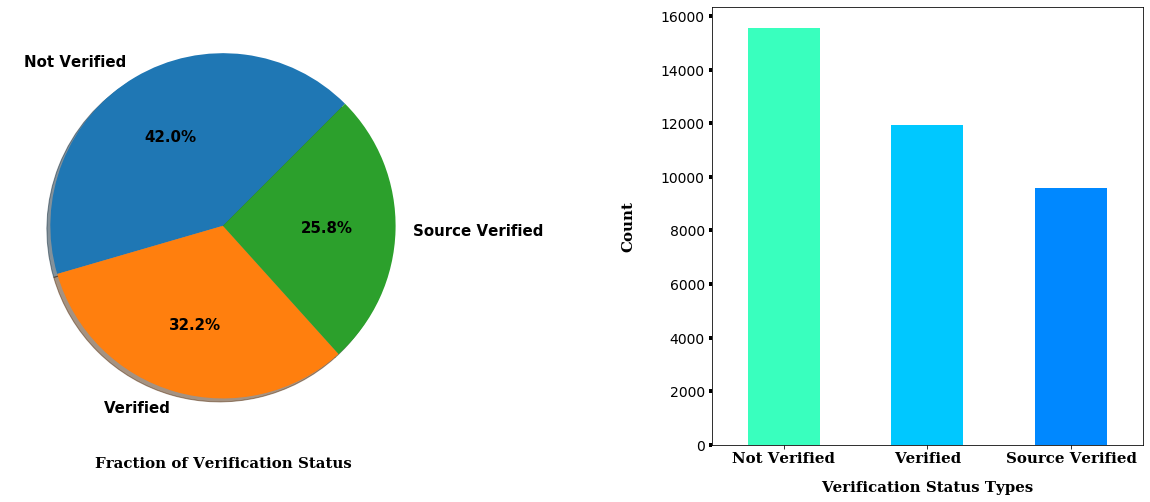

In [93]:
# For verification_status
verification_status_freq = generate_freq_table(master_frame.verification_status)
print("\n\nType of Verification Status Overview\n"+20*"==")
print(verification_status_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(verification_status_freq, 
                                   pie_xlabel = "Fraction of Verification Status",
                                   bar_xlabel = "Verification Status Types"
                                   )

In [94]:
loan_status_with_verification_status = master_frame[["verification_status","loan_status"]].groupby(["verification_status","loan_status"]).size().reset_index(name="count").sort_values("verification_status")

# Create a new column which stores percentage of account 
loan_status_with_verification_status = loan_status_with_verification_status.assign(percentage = loan_status_with_verification_status[['count','verification_status']].apply(lambda x: 
                                                                                                                    round(100*x['count']/verification_status_freq.loc[x['verification_status'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_verification_status)

  verification_status  loan_status  count  percentage
0        Not Verified  Charged Off   1863       11.96
1        Not Verified      Current    220        1.41
2        Not Verified   Fully Paid  13489       86.62
3     Source Verified  Charged Off   1360       14.21
4     Source Verified      Current    292        3.05
5     Source Verified   Fully Paid   7922       82.74
6            Verified  Charged Off   1891       15.85
7            Verified      Current    565        4.74
8            Verified   Fully Paid   9473       79.41


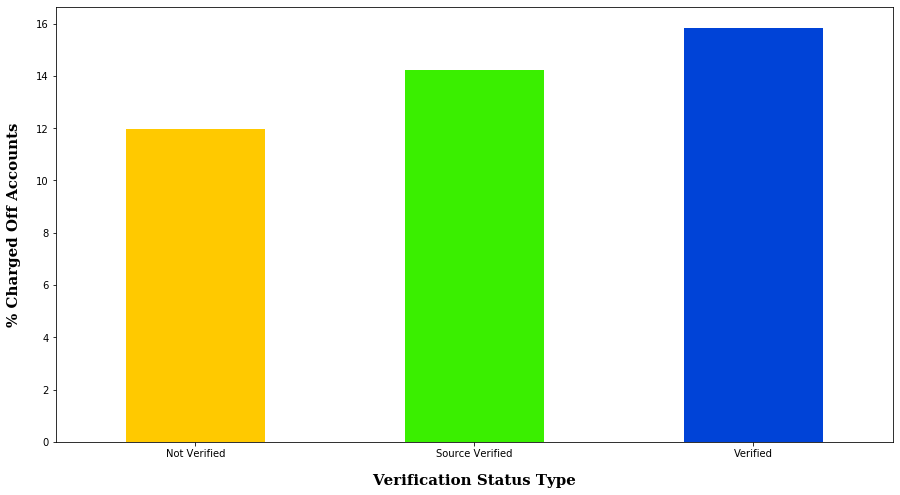

In [95]:
charged_off_df = loan_status_with_verification_status[loan_status_with_verification_status.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('verification_status')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('prism')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Verification Status Type", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)


plt.show()

> __We can observe that "Verified" customers are more likely to get Charged Off__

In [96]:
feature_columns.append('verification_status') # Added as feature column

### Column "issue_d"

In [97]:
# Extract the month details from Loan Issue Date
master_frame['issue_d_month'] = master_frame['issue_d'].dt.strftime("%b")

Loan Issue Month Data Overview
count     37075
unique       12
top         Dec
freq       4166
Name: issue_d_month, dtype: object


Loan Issue Month Overview
     count  percent
Dec   4166    11.24
Nov   3914    10.56
Oct   3642     9.82
Sep   3439     9.28
Aug   3343     9.02
Jul   3267     8.81
Jun   3113     8.40
May   2851     7.69
Apr   2705     7.30
Mar   2456     6.62
Jan   2104     5.67
Feb   2075     5.60


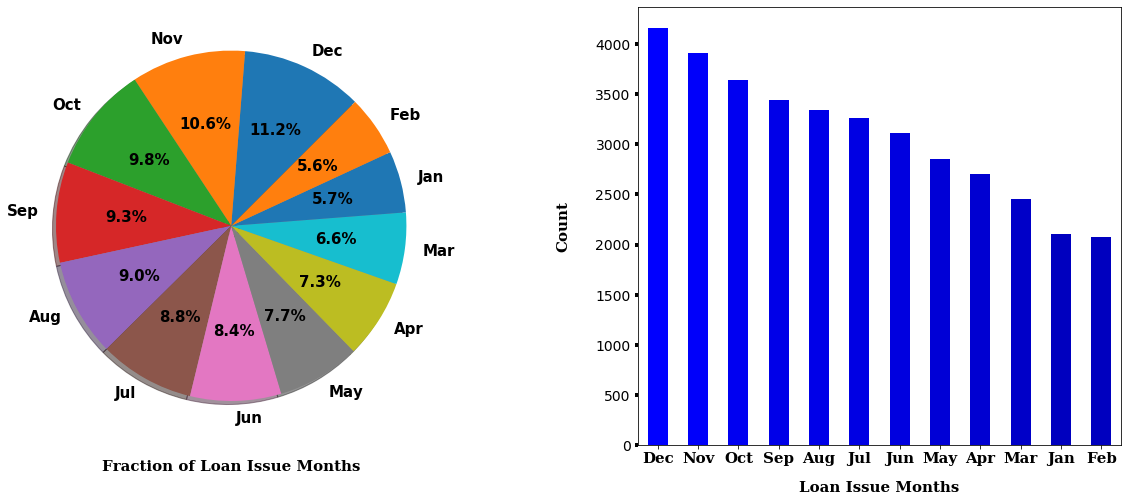

In [98]:
# For issue_d / issue_d_month
print("Loan Issue Month Data Overview\n"+20*"==")
print(master_frame.issue_d_month.describe())

issue_d_month_freq = generate_freq_table(master_frame.issue_d_month)
print("\n\nLoan Issue Month Overview\n"+20*"==")
print(issue_d_month_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(issue_d_month_freq, 
                                   pie_xlabel = "Fraction of Loan Issue Months",
                                   bar_xlabel = "Loan Issue Months"
                                   )

> We can say that in the month of __"December"__ people have applied for most number of loans

In [99]:
loan_status_with_issue_month = master_frame[["issue_d_month","loan_status"]].groupby(["issue_d_month","loan_status"]).size().reset_index(name="count").sort_values("issue_d_month")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_issue_month = loan_status_with_issue_month.assign(percentage = loan_status_with_issue_month[['count','issue_d_month']].apply(lambda x: 
                                                                                                                    round(100*x['count']/issue_d_month_freq.loc[x['issue_d_month'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_issue_month)

   issue_d_month  loan_status  count  percentage
0            Apr  Charged Off    347       12.83
1            Apr      Current      3        0.11
2            Apr   Fully Paid   2355       87.06
3            Aug  Charged Off    438       13.10
4            Aug      Current    121        3.62
5            Aug   Fully Paid   2784       83.28
7            Dec      Current    211        5.06
8            Dec   Fully Paid   3333       80.00
6            Dec  Charged Off    622       14.93
9            Feb  Charged Off    236       11.37
10           Feb   Fully Paid   1839       88.63
11           Jan  Charged Off    273       12.98
12           Jan   Fully Paid   1831       87.02
15           Jul   Fully Paid   2703       82.74
13           Jul  Charged Off    448       13.71
14           Jul      Current    116        3.55
18           Jun   Fully Paid   2574       82.69
16           Jun  Charged Off    443       14.23
17           Jun      Current     96        3.08
19           Mar  Ch

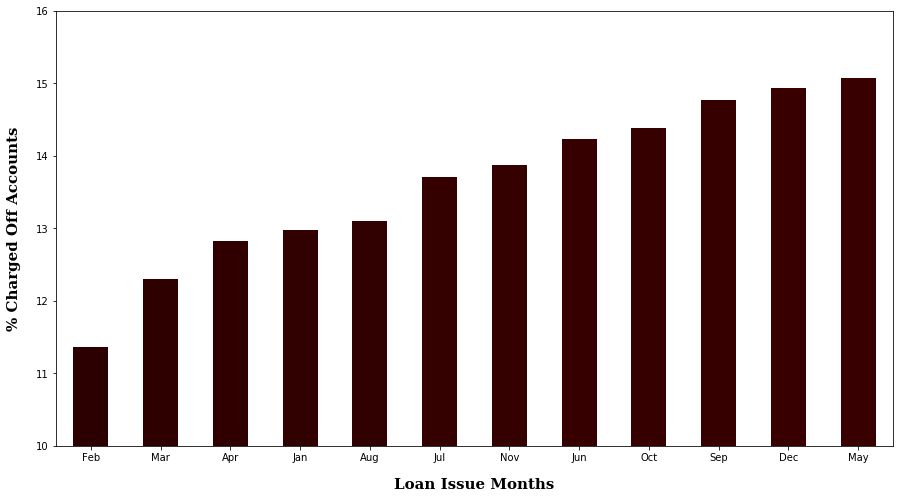

In [100]:
charged_off_df = loan_status_with_issue_month[loan_status_with_issue_month.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('issue_d_month')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('gist_heat')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Loan Issue Months", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(10,16)

plt.show()

> We can say that The loan issued on __"Dec", "May", "Sep"__ have the highest tendency to get charged off

In [101]:
feature_columns.append('issue_d') # Added as feature column

### Column "purpose"

In [102]:
# For purpose
print("Loan request purpose Data Overview\n"+20*"==")
print(master_frame.purpose.describe())

purpose_freq = generate_freq_table(master_frame.purpose)
print("\n\nLoan request purpose category Overview\n"+20*"==")
print(purpose_freq)
print(25*"===")


Loan request purpose Data Overview
count                  37075
unique                    14
top       debt_consolidation
freq                   17602
Name: purpose, dtype: object


Loan request purpose category Overview
                    count  percent
debt_consolidation  17602    47.48
credit_card          4797    12.94
other                3639     9.82
home_improvement     2705     7.30
major_purchase       2048     5.52
small_business       1668     4.50
car                  1457     3.93
wedding               898     2.42
medical               644     1.74
moving                541     1.46
house                 350     0.94
vacation              345     0.93
educational           290     0.78
renewable_energy       91     0.25


> Most of the time people have applied for loan for "debt_consolidation" purposes

In [103]:
loan_status_with_purpose = master_frame[["purpose","loan_status"]].groupby(["purpose","loan_status"]).size().reset_index(name="count").sort_values("purpose")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_purpose = loan_status_with_purpose.assign(percentage = loan_status_with_purpose[['count','purpose']].apply(lambda x: 
                                                                                                                    round(100*x['count']/purpose_freq.loc[x['purpose'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_purpose)

               purpose  loan_status  count  percentage
0                  car  Charged Off    150       10.30
1                  car      Current     49        3.36
2                  car   Fully Paid   1258       86.34
3          credit_card  Charged Off    488       10.17
4          credit_card      Current     99        2.06
5          credit_card   Fully Paid   4210       87.76
6   debt_consolidation  Charged Off   2560       14.54
7   debt_consolidation      Current    557        3.16
8   debt_consolidation   Fully Paid  14485       82.29
10         educational   Fully Paid    244       84.14
9          educational  Charged Off     46       15.86
11    home_improvement  Charged Off    303       11.20
12    home_improvement      Current     89        3.29
13    home_improvement   Fully Paid   2313       85.51
14               house  Charged Off     55       15.71
15               house      Current     14        4.00
16               house   Fully Paid    281       80.29
19      ma

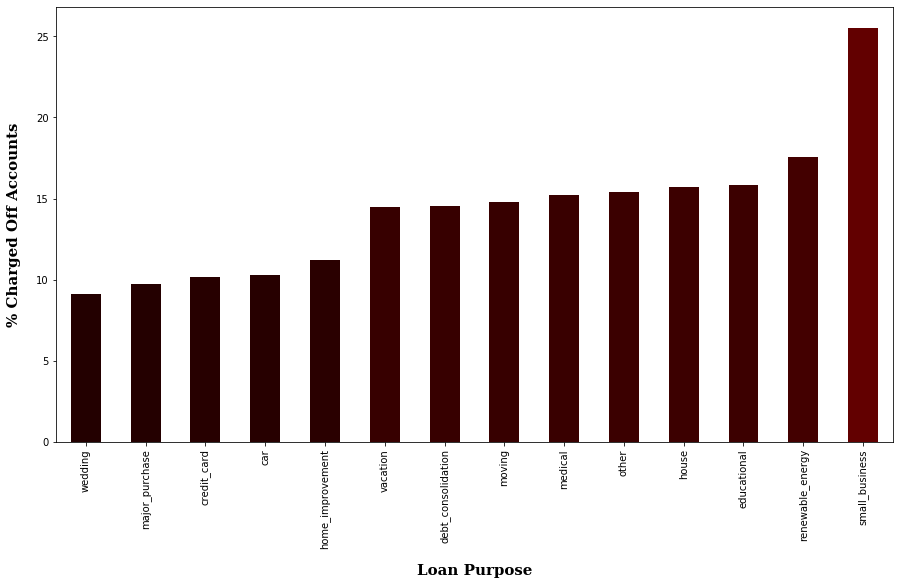

In [104]:
charged_off_df = loan_status_with_purpose[loan_status_with_purpose.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('purpose')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('gist_heat')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Loan Purpose", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
# plt.xticks(rotation0)


plt.show()

> This plot clearly indicates that people taken loan for __"small_business"__ purpose are more likely to get charged off. More than 25% account have charged off in the category.

In [105]:
feature_columns.append('purpose') # Added as feature column

### Column "addr_state"

In [106]:
# For addr_state
print("Borrower's State Data Overview\n"+20*"==")
print(master_frame.addr_state.describe())

addr_state_freq = generate_freq_table(master_frame.addr_state)
print("\n\nBorrower's State Overview\n"+20*"==")
print(addr_state_freq)
print(25*"===")


Borrower's State Data Overview
count     37075
unique       48
top          CA
freq       6637
Name: addr_state, dtype: object


Borrower's State Overview
    count  percent
CA   6637    17.90
NY   3538     9.54
FL   2665     7.19
TX   2568     6.93
NJ   1740     4.69
PA   1452     3.92
IL   1441     3.89
VA   1310     3.53
GA   1299     3.50
MA   1242     3.35
OH   1152     3.11
MD    975     2.63
AZ    800     2.16
WA    761     2.05
CO    732     1.97
NC    711     1.92
CT    691     1.86
MI    666     1.80
MO    644     1.74
MN    574     1.55
NV    468     1.26
SC    449     1.21
OR    427     1.15
WI    425     1.15
AL    421     1.14
LA    409     1.10
KY    314     0.85
OK    291     0.78
KS    255     0.69
UT    244     0.66
AR    232     0.63
DC    208     0.56
RI    187     0.50
NM    172     0.46
HI    167     0.45
WV    167     0.45
NH    155     0.42
DE    108     0.29
MT     78     0.21
WY     78     0.21
AK     75     0.20
SD     61     0.16
VT     51     0.14
MS     19

In [107]:
loan_status_with_state = master_frame[["addr_state","loan_status"]].groupby(["addr_state","loan_status"]).size().reset_index(name="count").sort_values("addr_state")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_state = loan_status_with_state.assign(percentage = loan_status_with_state[['count','addr_state']].apply(lambda x: 
                                                                                                                    round(100*x['count']/addr_state_freq.loc[x['addr_state'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_state[loan_status_with_state.loan_status=='Charged Off'].sort_values(['percentage'], ascending=False))

    addr_state  loan_status  count  percentage
83          NV  Charged Off     98       20.94
110         TN  Charged Off      2       20.00
0           AK  Charged Off     14       18.67
107         SD  Charged Off     11       18.03
27          FL  Charged Off    450       16.89
80          NM  Charged Off     29       16.86
33          HI  Charged Off     28       16.77
95          OR  Charged Off     68       15.93
62          MO  Charged Off    102       15.84
77          NJ  Charged Off    265       15.23
12          CA  Charged Off   1010       15.22
115         UT  Charged Off     37       15.16
124         WA  Charged Off    115       15.11
30          GA  Charged Off    195       15.01
74          NH  Charged Off     23       14.84
53          MD  Charged Off    144       14.77
104         SC  Charged Off     64       14.25
70          NC  Charged Off    101       14.21
44          KY  Charged Off     44       14.01
56          MI  Charged Off     92       13.81
9           A

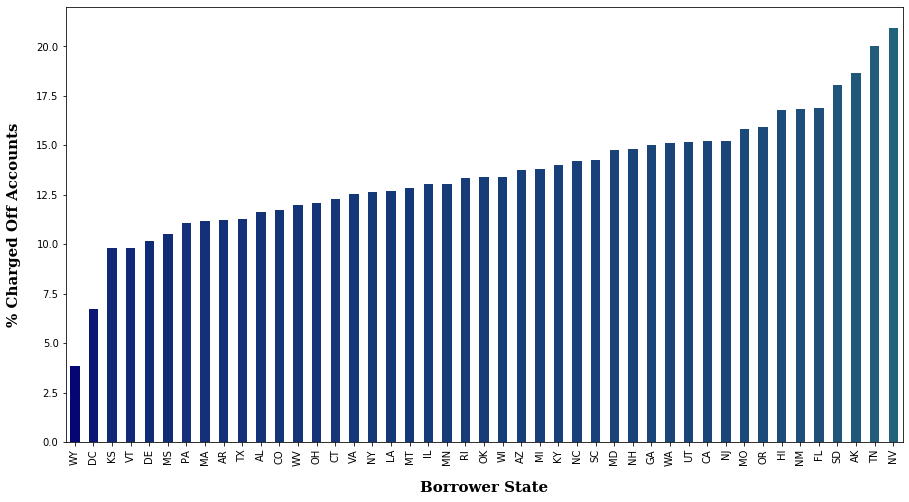

In [108]:
charged_off_df = loan_status_with_state[loan_status_with_state.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('addr_state')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('gist_earth')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Borrower State", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)


plt.show()

> People from "AK", "TN", "NV" are more likely to get Charged off

In [109]:
feature_columns.append('addr_state') # Added as feature column

### Column "dti"

Debt-to-income (dti) ratio Data Overview
count    37075.000000
mean        13.417031
std          6.645249
min          0.000000
25%          8.320000
50%         13.510000
75%         18.660000
max         29.990000
Name: dti, dtype: float64


Debt-to-income (dti) ratio Bins
[-0.02999  7.4975  14.995   22.4925  29.99   ]


Debt-to-income (dti) ratio Categorical Overview
           count  percent
Lower-mid  13439    36.25
Medium     12140    32.74
Low         7955    21.46
High        3541     9.55


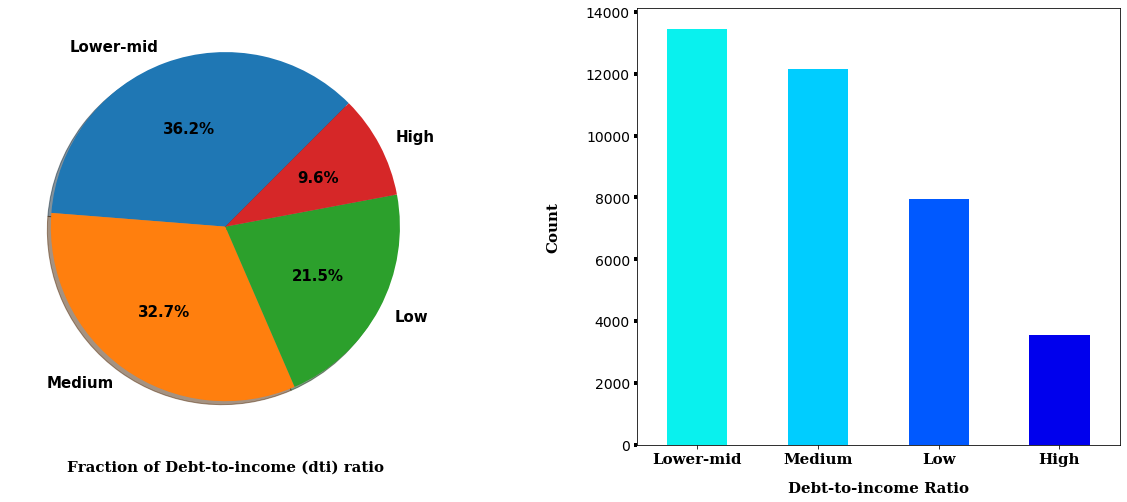

In [110]:
# for debt-to-income (DTI) ratio

print("Debt-to-income (dti) ratio Data Overview\n"+20*"==")
print(master_frame.dti.describe())

master_frame['dti_cat'], dti_bins = pd.cut(master_frame['dti'], 
                                                       4,
                                                         labels=['Low', 'Lower-mid', 'Medium', 'High'], 
                                                         retbins=True
                                                    )

print("\n\nDebt-to-income (dti) ratio Bins")
print(dti_bins)

dti_category_freq = generate_freq_table(master_frame.dti_cat)
print("\n\nDebt-to-income (dti) ratio Categorical Overview\n"+20*"==")
print(dti_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(dti_category_freq, 
                                   pie_xlabel = "Fraction of Debt-to-income (dti) ratio",
                                   bar_xlabel = "Debt-to-income Ratio"
                                   )

In [111]:
loan_status_with_dti = master_frame[["dti_cat","loan_status"]].groupby(["dti_cat","loan_status"]).size().reset_index(name="count").sort_values("dti_cat")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_dti = loan_status_with_dti.assign(percentage = loan_status_with_dti[['count','dti_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/dti_category_freq.loc[x['dti_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_dti)

      dti_cat  loan_status  count  percentage
0         Low  Charged Off    926       11.64
1         Low      Current    167        2.10
2         Low   Fully Paid   6862       86.26
3   Lower-mid  Charged Off   1803       13.42
4   Lower-mid      Current    368        2.74
5   Lower-mid   Fully Paid  11268       83.85
6      Medium  Charged Off   1848       15.22
7      Medium      Current    388        3.20
8      Medium   Fully Paid   9904       81.58
9        High  Charged Off    537       15.17
10       High      Current    154        4.35
11       High   Fully Paid   2850       80.49


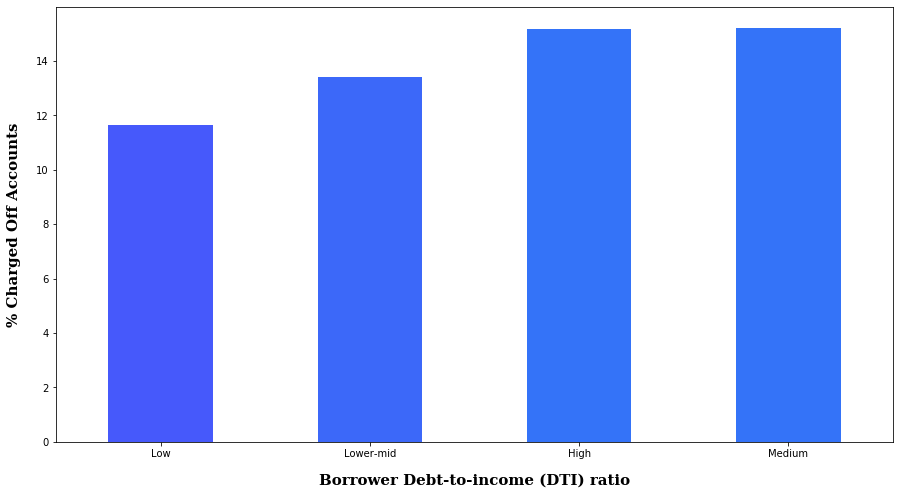

In [112]:
charged_off_df = loan_status_with_dti[loan_status_with_dti.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('dti_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Borrower Debt-to-income (DTI) ratio", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)


plt.show()

> People with "Higher" Debt-to-income ratio are more likely to get Charged off

In [113]:
feature_columns.append('dti') # Added as feature column

### Column "delinq_2yrs"

In [114]:
# Convert "Number of Delinqiency Incidence" to categorical
master_frame["delinq_2yrs"] = master_frame["delinq_2yrs"].astype("category")

In [115]:
# For delinq_2yrs
print("Number of Delinquency incidence Data Overview\n"+20*"==")
print(master_frame.delinq_2yrs.describe())

delinq_2yrs_freq = generate_freq_table(master_frame.delinq_2yrs)
print("\n\nNumber of Delinquency incidence Overview\n"+20*"==")
print(delinq_2yrs_freq)
print(25*"===")


Number of Delinquency incidence Data Overview
count     37075
unique       11
top           0
freq      33078
Name: delinq_2yrs, dtype: int64


Number of Delinquency incidence Overview
    count  percent
0   33078    89.22
1    3076     8.30
2     628     1.69
3     199     0.54
4      55     0.15
5      21     0.06
6      10     0.03
7       4     0.01
8       2     0.01
11      1     0.00
9       1     0.00


In [116]:
loan_status_with_delinq_2yrs = master_frame[["delinq_2yrs","loan_status"]].groupby(["delinq_2yrs","loan_status"]).size().reset_index(name="count").sort_values("delinq_2yrs")
# loan_term_freq.loc[36,'count']
# Create a new column which stores percentage of account 
loan_status_with_delinq_2yrs = loan_status_with_delinq_2yrs.assign(percentage = loan_status_with_delinq_2yrs[['count','delinq_2yrs']].apply(lambda x: 
                                                                                                                    round(100*x['count']/delinq_2yrs_freq.loc[x['delinq_2yrs'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_delinq_2yrs)

   delinq_2yrs  loan_status  count  percentage
0            0  Charged Off   4494       13.59
1            0      Current    962        2.91
2            0   Fully Paid  27622       83.51
3            1  Charged Off    461       14.99
4            1      Current     91        2.96
5            1   Fully Paid   2524       82.05
6            2  Charged Off    115       18.31
7            2      Current     14        2.23
8            2   Fully Paid    499       79.46
9            3  Charged Off     26       13.07
10           3      Current      8        4.02
11           3   Fully Paid    165       82.91
14           4   Fully Paid     41       74.55
12           4  Charged Off     12       21.82
13           4      Current      2        3.64
15           5  Charged Off      3       14.29
16           5   Fully Paid     18       85.71
17           6  Charged Off      1       10.00
18           6   Fully Paid      9       90.00
19           7  Charged Off      1       25.00
20           

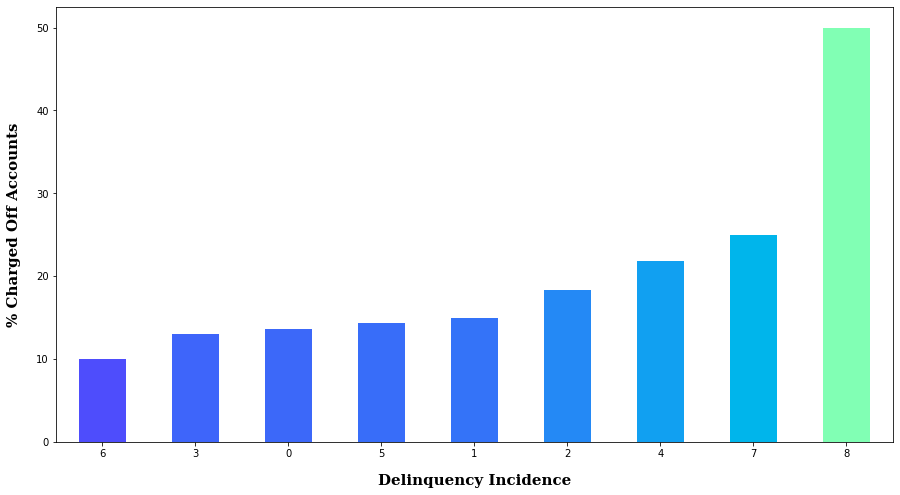

In [117]:
charged_off_df = loan_status_with_delinq_2yrs[loan_status_with_delinq_2yrs.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('delinq_2yrs')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Delinquency Incidence", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)

plt.show()

> We can say that people with more than 7 delinquency incidences are more likely to get Charged Off

In [118]:
feature_columns.append('delinq_2yrs') # Added as feature column

### Column "earliest_cr_line"

In [119]:
master_frame.earliest_cr_line.head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [120]:
# Extract Month information from earliest_cr_line column
master_frame['earliest_cr_line_month'] = master_frame['earliest_cr_line'].dt.strftime("%b")

Earliest reported credit line Data Overview
count     37075
unique       12
top         Oct
freq       3820
Name: earliest_cr_line_month, dtype: object


Loan Issue Month Overview
     count  percent
Oct   3820    10.30
Dec   3790    10.22
Nov   3682     9.93
Sep   3349     9.03
Jan   3234     8.72
Aug   3088     8.33
Jul   2853     7.70
Jun   2745     7.40
May   2696     7.27
Feb   2678     7.22
Mar   2574     6.94
Apr   2566     6.92


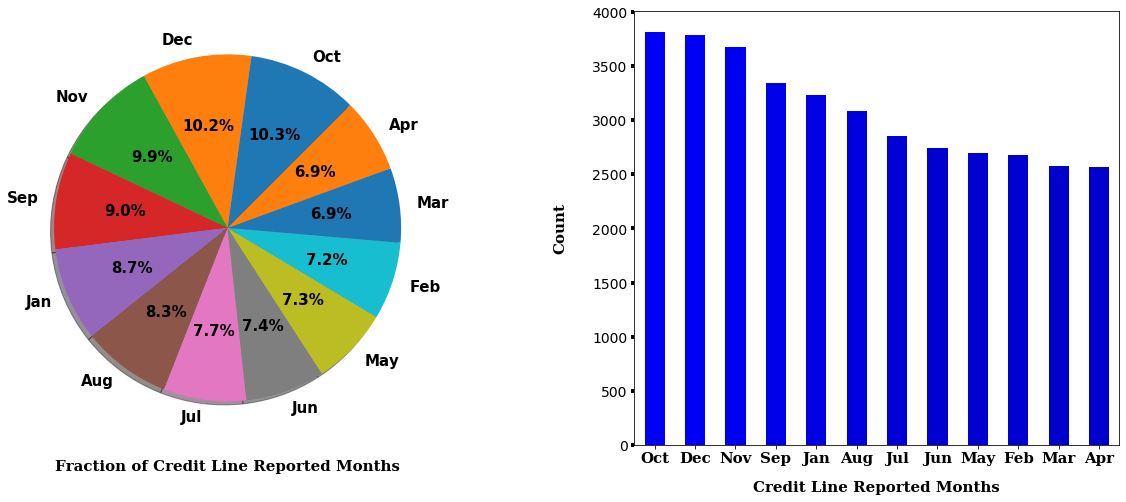

In [121]:
# For earliest_cr_line / earliest_cr_line_month
print("Earliest reported credit line Data Overview\n"+20*"==")
print(master_frame.earliest_cr_line_month.describe())

earliest_cr_line_month_freq = generate_freq_table(master_frame.earliest_cr_line_month)
print("\n\nLoan Issue Month Overview\n"+20*"==")
print(earliest_cr_line_month_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(earliest_cr_line_month_freq, 
                                   pie_xlabel = "Fraction of Credit Line Reported Months",
                                   bar_xlabel = "Credit Line Reported Months"
                                   )

In [122]:
loan_status_with_earliest_cr_line_month = master_frame[["earliest_cr_line_month","loan_status"]].groupby(["earliest_cr_line_month","loan_status"]).size().reset_index(name="count").sort_values("earliest_cr_line_month")

# Create a new column which stores percentage of account 
loan_status_with_earliest_cr_line_month = loan_status_with_earliest_cr_line_month.assign(percentage = loan_status_with_earliest_cr_line_month[['count','earliest_cr_line_month']].apply(lambda x: 
                                                                                                                    round(100*x['count']/earliest_cr_line_month_freq.loc[x['earliest_cr_line_month'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_earliest_cr_line_month)

   earliest_cr_line_month  loan_status  count  percentage
0                     Apr  Charged Off    398       15.51
1                     Apr      Current     88        3.43
2                     Apr   Fully Paid   2080       81.06
3                     Aug  Charged Off    415       13.44
4                     Aug      Current     86        2.78
5                     Aug   Fully Paid   2587       83.78
6                     Dec  Charged Off    543       14.33
7                     Dec      Current    112        2.96
8                     Dec   Fully Paid   3135       82.72
9                     Feb  Charged Off    394       14.71
10                    Feb      Current     94        3.51
11                    Feb   Fully Paid   2190       81.78
12                    Jan  Charged Off    496       15.34
13                    Jan      Current     93        2.88
14                    Jan   Fully Paid   2645       81.79
16                    Jul      Current     90        3.15
17            

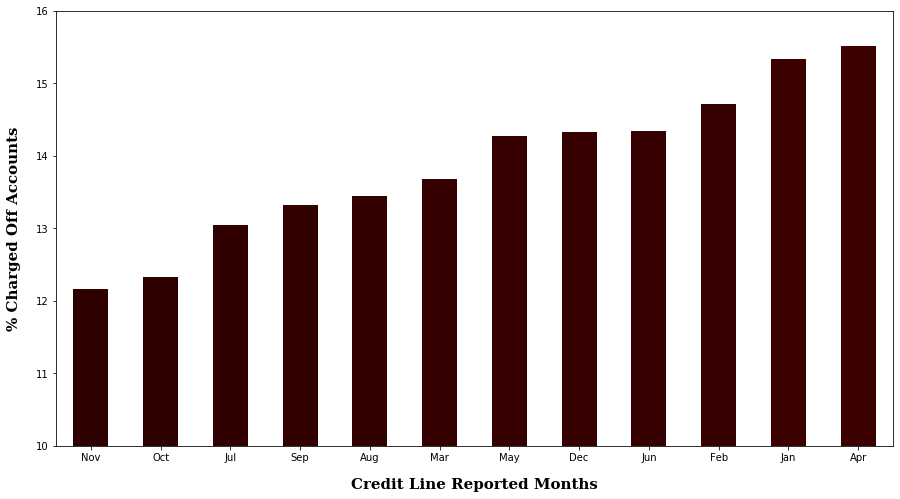

In [123]:
charged_off_df = loan_status_with_earliest_cr_line_month[loan_status_with_earliest_cr_line_month.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('earliest_cr_line_month')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('gist_heat')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Credit Line Reported Months", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(10,16)

plt.show()

> "Jan", "Feb", "Apr" are the 3 months where Credit Line were Reported are getting more Charge off incidences.

In [124]:
feature_columns.append('earliest_cr_line') # Added as feature column

### Column "inq_last_6mths"

In [125]:
# Convert "inq_last_6mths" to categorical variable
master_frame["inq_last_6mths"] = master_frame["inq_last_6mths"].astype("category")

In [126]:
# For inq_last_6mths
print("Number of Inquiries (last 6 months) Data Overview\n"+20*"==")
print(master_frame.inq_last_6mths.describe())

inq_last_6mths_freq = generate_freq_table(master_frame.inq_last_6mths)
print("\n\nNumber of Inquiries (last 6 months) Overview\n"+20*"==")
print(inq_last_6mths_freq)
print(25*"===")


Number of Inquiries (last 6 months) Data Overview
count     37075
unique        9
top           0
freq      18030
Name: inq_last_6mths, dtype: int64


Number of Inquiries (last 6 months) Overview
   count  percent
0  18030    48.63
1  10254    27.66
2   5440    14.67
3   2825     7.62
4    291     0.78
5    137     0.37
6     54     0.15
7     32     0.09
8     12     0.03


In [127]:
loan_status_with_inq_last_6mths_freq = master_frame[["inq_last_6mths","loan_status"]].groupby(["inq_last_6mths","loan_status"]).size().reset_index(name="count").sort_values("inq_last_6mths")

# Create a new column which stores percentage of account 
loan_status_with_inq_last_6mths_freq = loan_status_with_inq_last_6mths_freq.assign(percentage = loan_status_with_inq_last_6mths_freq[['count','inq_last_6mths']].apply(lambda x: 
                                                                                                                    round(100*x['count']/inq_last_6mths_freq.loc[x['inq_last_6mths'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_inq_last_6mths_freq)

   inq_last_6mths  loan_status  count  percentage
0               0  Charged Off   2068       11.47
1               0      Current    552        3.06
2               0   Fully Paid  15410       85.47
3               1  Charged Off   1542       15.04
4               1      Current    292        2.85
5               1   Fully Paid   8420       82.11
6               2  Charged Off    860       15.81
7               2      Current    156        2.87
8               2   Fully Paid   4424       81.32
9               3  Charged Off    557       19.72
10              3      Current     62        2.19
11              3   Fully Paid   2206       78.09
14              4   Fully Paid    243       83.51
13              4      Current     10        3.44
12              4  Charged Off     38       13.06
15              5  Charged Off     25       18.25
16              5      Current      2        1.46
17              5   Fully Paid    110       80.29
18              6  Charged Off     13       24.07


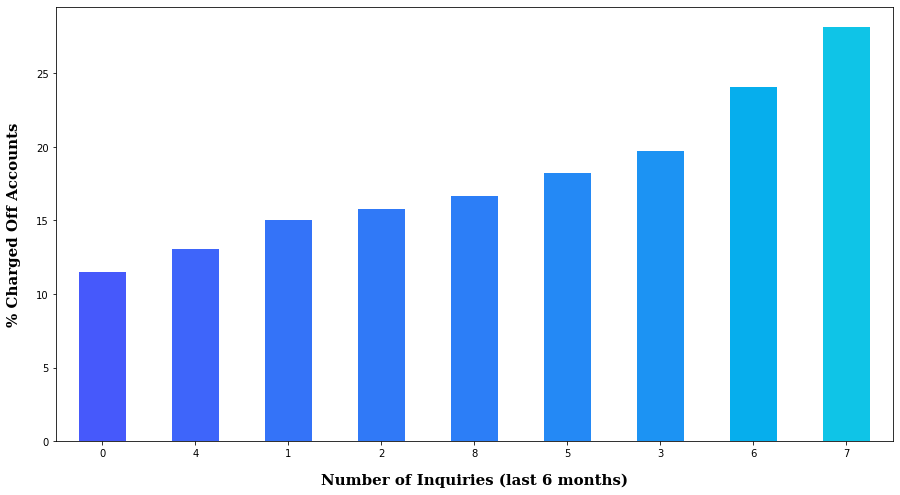

In [128]:
charged_off_df = loan_status_with_inq_last_6mths_freq[loan_status_with_inq_last_6mths_freq.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('inq_last_6mths')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Number of Inquiries (last 6 months)", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)

plt.show()

> Accounts are getting charged off where number of inquiries are 6 or more.

In [129]:
feature_columns.append('inq_last_6mths') # Added as feature column

### Column "open_acc"

Number of open credit lines Data Overview
count    37075.000000
mean         9.275118
std          4.352700
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


Debt-to-income (dti) ratio Bins
IntervalIndex([(0, 10], (11, 20], (21, 50]],
              closed='right',
              dtype='interval[int64]')


Number of open credit lines Categorical Overview
          count  percent
(0, 10]   24782    72.31
(11, 20]   9043    26.39
(21, 50]    447     1.30


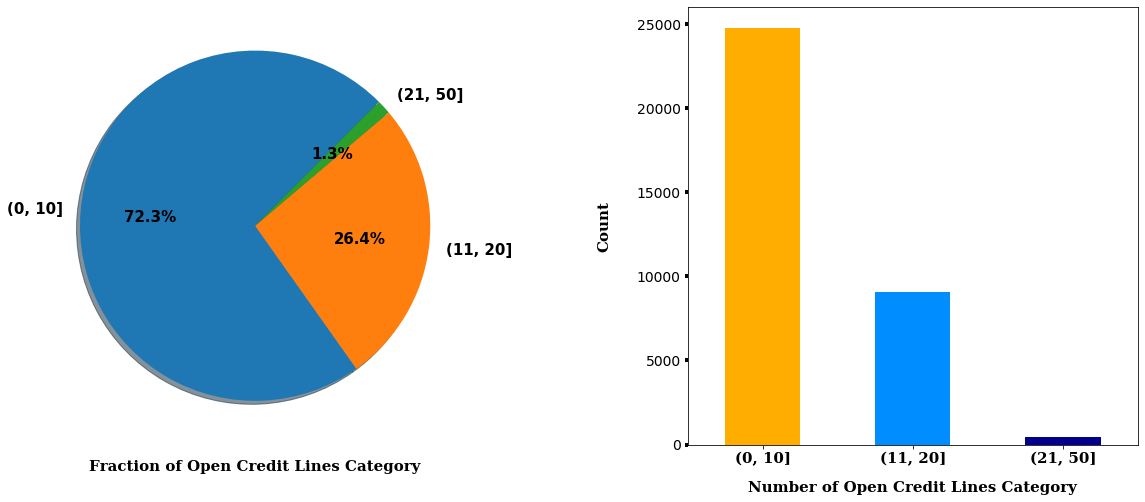

In [130]:
# for open_acc

print("Number of open credit lines Data Overview\n"+20*"==")
print(master_frame.open_acc.describe())

master_frame['open_acc_cat'], open_acc_bins = pd.cut(master_frame['open_acc'], 
                                                       bins=pd.IntervalIndex.from_tuples([(0, 10), (11, 20), (21, 50)]),
                                                         retbins=True
                                                    )

print("\n\nDebt-to-income (dti) ratio Bins")
print(open_acc_bins)

open_acc_category_freq = generate_freq_table(master_frame.open_acc_cat)
print("\n\nNumber of open credit lines Categorical Overview\n"+20*"==")
print(open_acc_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(open_acc_category_freq, 
                                   pie_xlabel = "Fraction of Open Credit Lines Category",
                                   bar_xlabel = "Number of Open Credit Lines Category"
                                   )

> Above 70% data present where number of open credit line is less than 10.

In [131]:
loan_status_with_open_acc = master_frame[["open_acc_cat","loan_status"]].groupby(["open_acc_cat","loan_status"]).size().reset_index(name="count").sort_values("open_acc_cat")

# Create a new column which stores percentage of account 
loan_status_with_open_acc = loan_status_with_open_acc.assign(percentage = loan_status_with_open_acc[['count','open_acc_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/open_acc_category_freq.loc[x['open_acc_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_open_acc)

  open_acc_cat  loan_status  count  percentage
0      (0, 10]  Charged Off   3441       13.89
1      (0, 10]      Current    678        2.74
2      (0, 10]   Fully Paid  20663       83.38
3     (11, 20]  Charged Off   1218       13.47
4     (11, 20]      Current    296        3.27
5     (11, 20]   Fully Paid   7529       83.26
6     (21, 50]  Charged Off     67       14.99
7     (21, 50]      Current     17        3.80
8     (21, 50]   Fully Paid    363       81.21


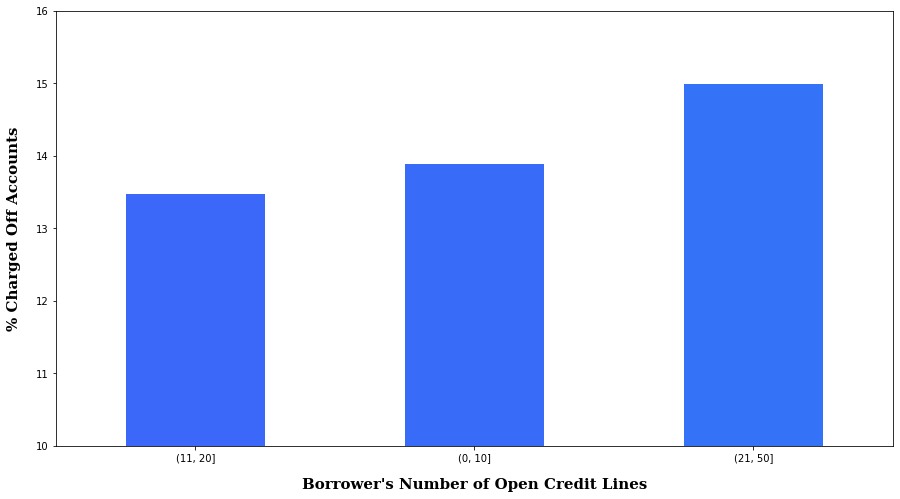

In [132]:
charged_off_df = loan_status_with_open_acc[loan_status_with_open_acc.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('open_acc_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Borrower's Number of Open Credit Lines", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(10,16)

plt.show()

> There is chance of getting an account charged off where number of open credit lines are more than 21

In [133]:
feature_columns.append('open_acc') # Added as feature column

### Column "pub_rec"

In [134]:
# Number of derogatory public records
master_frame.pub_rec.value_counts()

0    35127
1     1892
2       47
3        7
4        2
Name: pub_rec, dtype: int64

In [135]:
# Convert "pub_rec" as categorical
master_frame["pub_rec"] = master_frame["pub_rec"].astype("category")

In [136]:
# For pub_rec
print("Number of derogatory public records Data Overview\n"+20*"==")
print(master_frame.pub_rec.describe())

pub_rec_freq = generate_freq_table(master_frame.pub_rec)
print("\n\nNumber of derogatory public records Overview\n"+20*"==")
print(pub_rec_freq)
print(25*"===")


Number of derogatory public records Data Overview
count     37075
unique        5
top           0
freq      35127
Name: pub_rec, dtype: int64


Number of derogatory public records Overview
   count  percent
0  35127    94.75
1   1892     5.10
2     47     0.13
3      7     0.02
4      2     0.01


> Above 94% accounts have no public derogatory records

In [137]:
loan_status_with_pub_rec = master_frame[["pub_rec","loan_status"]].groupby(["pub_rec","loan_status"]).size().reset_index(name="count").sort_values("pub_rec")

# Create a new column which stores percentage of account 
loan_status_with_pub_rec = loan_status_with_pub_rec.assign(percentage = loan_status_with_pub_rec[['count','pub_rec']].apply(lambda x: 
                                                                                                                    round(100*x['count']/pub_rec_freq.loc[x['pub_rec'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_pub_rec)

   pub_rec  loan_status  count  percentage
0        0  Charged Off   4698       13.37
1        0      Current   1035        2.95
2        0   Fully Paid  29394       83.68
3        1  Charged Off    406       21.46
4        1      Current     39        2.06
5        1   Fully Paid   1447       76.48
6        2  Charged Off     10       21.28
7        2      Current      3        6.38
8        2   Fully Paid     34       72.34
9        3   Fully Paid      7      100.00
10       4   Fully Paid      2      100.00


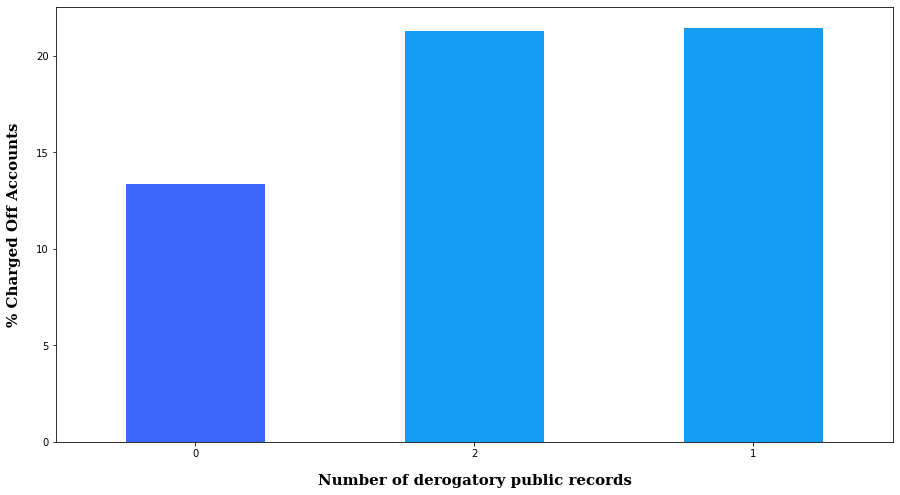

In [138]:
charged_off_df = loan_status_with_pub_rec[loan_status_with_pub_rec.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('pub_rec')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Number of derogatory public records", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.show()

> Accounts with derogatory public records are more likely to get charged off

In [139]:
feature_columns.append('pub_rec') # Added as feature column

### Column "revol_bal"

Total credit revolving balance Data Overview
count    37075.000000
mean     12352.985111
std      12447.857804
min          0.000000
25%       3715.000000
50%       8810.000000
75%      16660.000000
max      79761.000000
Name: revol_bal, dtype: float64


Total credit revolving balance Bins
[  -79.761 26587.    53174.    79761.   ]


Total credit revolving balance Categorical Overview
        count  percent
Low     33030    89.09
Medium   3371     9.09
High      674     1.82


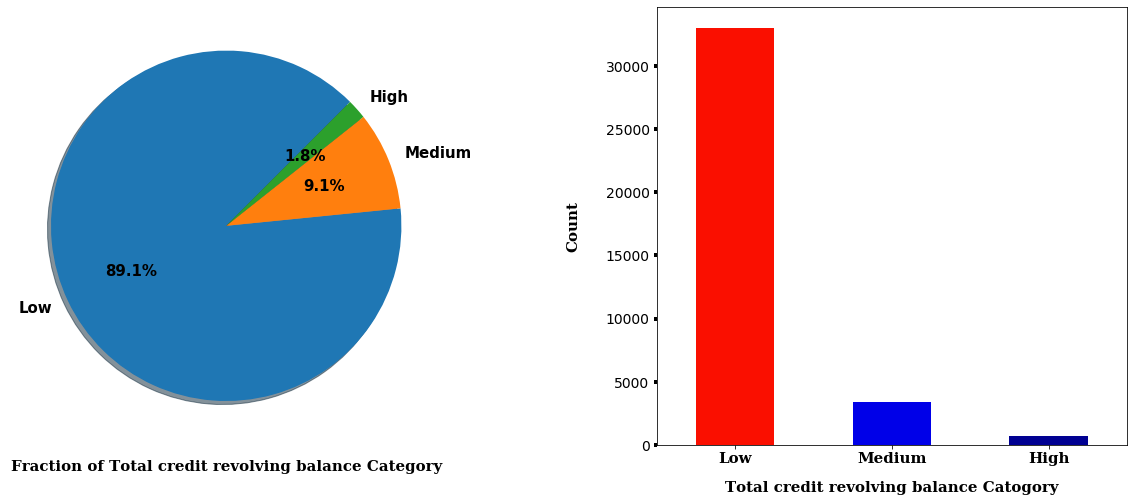

In [140]:
# for revol_bal

print("Total credit revolving balance Data Overview\n"+20*"==")
print(master_frame.revol_bal.describe())

master_frame['revol_bal_cat'], revol_bal_bins = pd.cut(master_frame['revol_bal'], 
                                                       3,
                                                         labels=['Low', 'Medium', 'High'], 
                                                         retbins=True
                                                    )

print("\n\nTotal credit revolving balance Bins")
print(revol_bal_bins)

revol_bal_category_freq = generate_freq_table(master_frame.revol_bal_cat)
print("\n\nTotal credit revolving balance Categorical Overview\n"+20*"==")
print(revol_bal_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(revol_bal_category_freq, 
                                   pie_xlabel = "Fraction of Total credit revolving balance Category",
                                   bar_xlabel = "Total credit revolving balance Catogory"
                                   )

In [141]:
loan_status_with_revol_bal = master_frame[["revol_bal_cat","loan_status"]].groupby(["revol_bal_cat","loan_status"]).size().reset_index(name="count").sort_values("revol_bal_cat")

# Create a new column which stores percentage of account 
loan_status_with_revol_bal = loan_status_with_revol_bal.assign(percentage = loan_status_with_revol_bal[['count','revol_bal_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/revol_bal_category_freq.loc[x['revol_bal_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_revol_bal)

  revol_bal_cat  loan_status  count  percentage
0           Low  Charged Off   4518       13.68
1           Low      Current    906        2.74
2           Low   Fully Paid  27606       83.58
3        Medium  Charged Off    521       15.46
4        Medium      Current    144        4.27
5        Medium   Fully Paid   2706       80.27
6          High  Charged Off     75       11.13
7          High      Current     27        4.01
8          High   Fully Paid    572       84.87


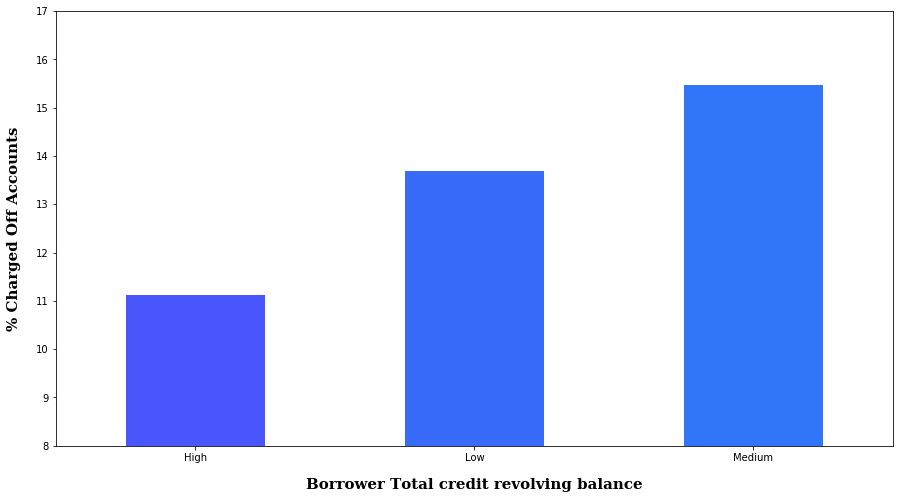

In [142]:
charged_off_df = loan_status_with_revol_bal[loan_status_with_revol_bal.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('revol_bal_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Borrower Total credit revolving balance", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(8,17)

plt.show()

> Accounts with "Medium" or "Low" total credit revolving balance are getting charged off

In [143]:
feature_columns.append('revol_bal') # Added as feature column

### Column "revol_util"

In [144]:
master_frame.revol_util.describe()

count    37075.000000
mean        49.024812
std         28.249823
min          0.000000
25%         25.700000
50%         49.600000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

Revolving line utilization rate Data Overview
count    37075.000000
mean        49.024812
std         28.249823
min          0.000000
25%         25.700000
50%         49.600000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64


Revolving line utilization rate Bins
[-0.0999 33.3    66.6    99.9   ]


Revolving line utilization rate Categorical Overview
        count  percent
Medium  13366    36.05
Low     12122    32.70
High    11587    31.25


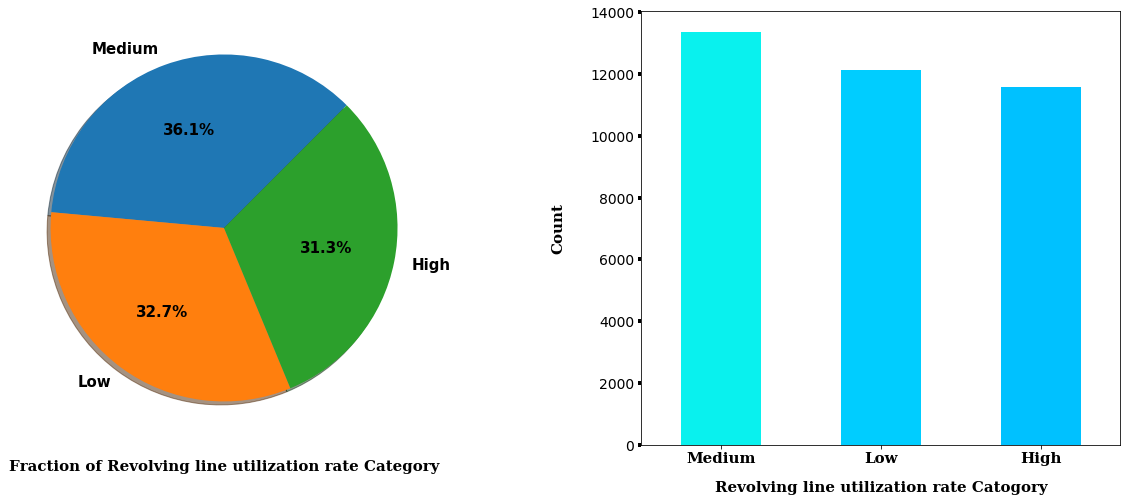

In [145]:
# for revol_util

print("Revolving line utilization rate Data Overview\n"+20*"==")
print(master_frame.revol_util.describe())

master_frame['revol_util_cat'], revol_util_bins = pd.cut(master_frame['revol_util'], 
                                                       3,
                                                         labels=['Low', 'Medium', 'High'], 
                                                         retbins=True
                                                    )

print("\n\nRevolving line utilization rate Bins")
print(revol_util_bins)

revol_util_category_freq = generate_freq_table(master_frame.revol_util_cat)
print("\n\nRevolving line utilization rate Categorical Overview\n"+20*"==")
print(revol_util_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(revol_util_category_freq, 
                                   pie_xlabel = "Fraction of Revolving line utilization rate Category",
                                   bar_xlabel = "Revolving line utilization rate Catogory"
                                   )

In [146]:
loan_status_with_revol_util = master_frame[["revol_util_cat","loan_status"]].groupby(["revol_util_cat","loan_status"]).size().reset_index(name="count").sort_values("revol_util_cat")

# Create a new column which stores percentage of account 
loan_status_with_revol_util = loan_status_with_revol_util.assign(percentage = loan_status_with_revol_util[['count','revol_util_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/revol_util_category_freq.loc[x['revol_util_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_revol_util)

  revol_util_cat  loan_status  count  percentage
0            Low  Charged Off   1211        9.99
1            Low      Current    278        2.29
2            Low   Fully Paid  10633       87.72
3         Medium  Charged Off   1822       13.63
4         Medium      Current    412        3.08
5         Medium   Fully Paid  11132       83.29
6           High  Charged Off   2081       17.96
7           High      Current    387        3.34
8           High   Fully Paid   9119       78.70


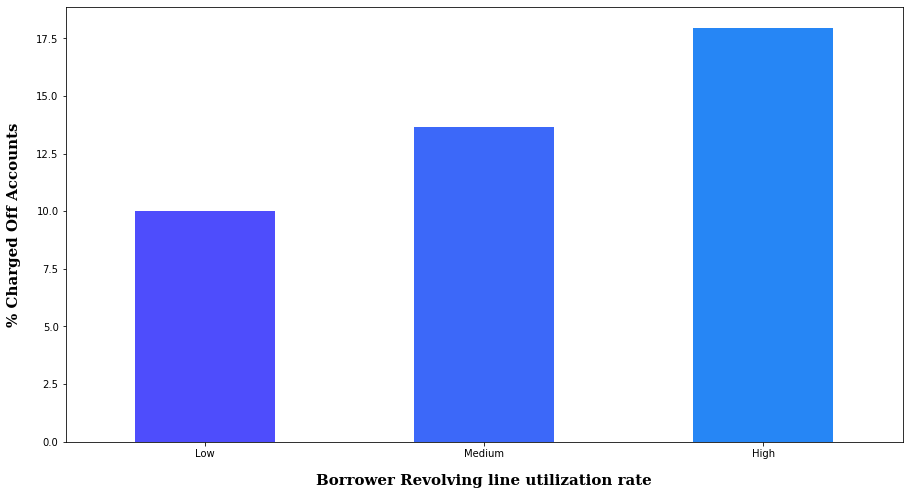

In [147]:
charged_off_df = loan_status_with_revol_util[loan_status_with_revol_util.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('revol_util_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Borrower Revolving line utilization rate", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)

plt.show()

> From the above plot we can say that as the revolving line utilization rate increases the account getting charged off increases

In [148]:
feature_columns.append('revol_util') # Added as feature column

### Column "total_acc"

In [149]:
master_frame.total_acc.describe()

count    37075.000000
mean        22.028213
std         11.309162
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

The total number of credit lines currently in the borrower's credit file Data Overview
count    37075.000000
mean        22.028213
std         11.309162
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


Total Number of credit lines Bins
IntervalIndex([(0, 20], (21, 40], (41, 100]],
              closed='right',
              dtype='interval[int64]')


Total Number of credit lines Categorical Overview
           count  percent
(0, 20]    18706    52.73
(21, 40]   14502    40.88
(41, 100]   2266     6.39


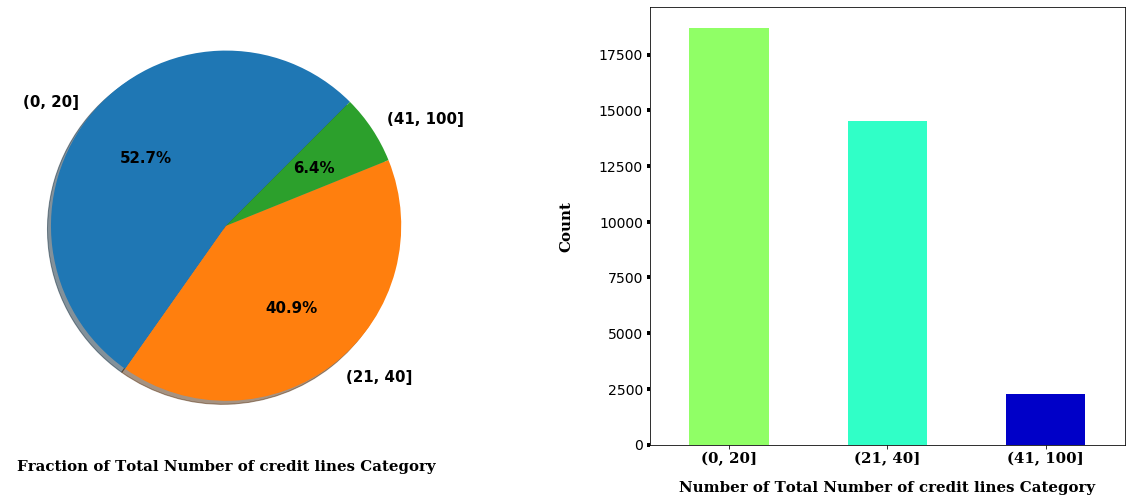

In [150]:
# for total_acc

print("The total number of credit lines currently in the borrower's credit file Data Overview\n"+20*"==")
print(master_frame.total_acc.describe())

master_frame['total_acc_cat'], total_acc_bins = pd.cut(master_frame['total_acc'], 
                                                       bins=pd.IntervalIndex.from_tuples([(0, 20), (21, 40), (41, 100)]),
                                                         retbins=True
                                                    )

print("\n\nTotal Number of credit lines Bins")
print(total_acc_bins)

total_acc_category_freq = generate_freq_table(master_frame.total_acc_cat)
print("\n\nTotal Number of credit lines Categorical Overview\n"+20*"==")
print(total_acc_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(total_acc_category_freq, 
                                   pie_xlabel = "Fraction of Total Number of credit lines Category",
                                   bar_xlabel = "Number of Total Number of credit lines Category"
                                   )



> We can see that more than 50% of the accounts have less than 20 total number of credit lines

In [151]:
loan_status_with_total_acc = master_frame[["total_acc_cat","loan_status"]].groupby(["total_acc_cat","loan_status"]).size().reset_index(name="count").sort_values("total_acc_cat")

# Create a new column which stores percentage of account 
loan_status_with_total_acc = loan_status_with_total_acc.assign(percentage = loan_status_with_total_acc[['count','total_acc_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/total_acc_category_freq.loc[x['total_acc_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_total_acc)



  total_acc_cat  loan_status  count  percentage
0       (0, 20]  Charged Off   2701       14.44
1       (0, 20]      Current    468        2.50
2       (0, 20]   Fully Paid  15537       83.06
3      (21, 40]  Charged Off   1918       13.23
4      (21, 40]      Current    489        3.37
5      (21, 40]   Fully Paid  12095       83.40
6     (41, 100]  Charged Off    294       12.97
7     (41, 100]      Current     57        2.52
8     (41, 100]   Fully Paid   1915       84.51


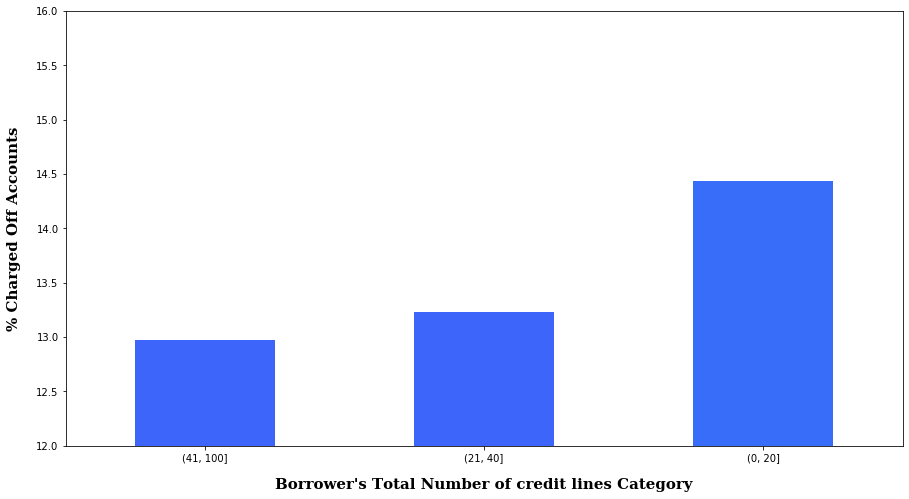

In [152]:
charged_off_df = loan_status_with_total_acc[loan_status_with_total_acc.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('total_acc_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Borrower's Total Number of credit lines Category", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(12,16)

plt.show()

> We can say that as the number of credit line decreases an account being charged off increases

In [153]:
feature_columns.append('total_acc') # Added as feature column

### Column "out_prncp"

In [154]:
master_frame[master_frame.out_prncp>0].loan_status.value_counts()

Current        1077
Fully Paid        0
Charged Off       0
Name: loan_status, dtype: int64

> We can say that for "Current" accounts "Remaining outstanding principal for total amount funded" are more than 0

In [155]:
master_frame[master_frame.out_prncp==0].loan_status.value_counts()

Fully Paid     30884
Charged Off     5114
Current            0
Name: loan_status, dtype: int64

> We can say that where "Remaining outstanding principal for total amount funded" is 0, out of all the account around 14% accounts are getting charged off

In [156]:
feature_columns.append('out_prncp') # Added as feature column

### Column "total_pymnt"

Payments received to date for total amount funded Data Overview
count    37075.000000
mean     12144.306269
std       8917.452147
min         33.730000
25%       5618.238428
50%       9961.860555
75%      16497.899470
max      58563.679930
Name: total_pymnt, dtype: float64


Payments received to date for total amount funded Bins
[-2.47999499e+01  1.95437133e+04  3.90536966e+04  5.85636799e+04]


Payments received to date for total amount funded Categorical Overview
        count  percent
Low     30591    82.51
Medium   5938    16.02
High      546     1.47


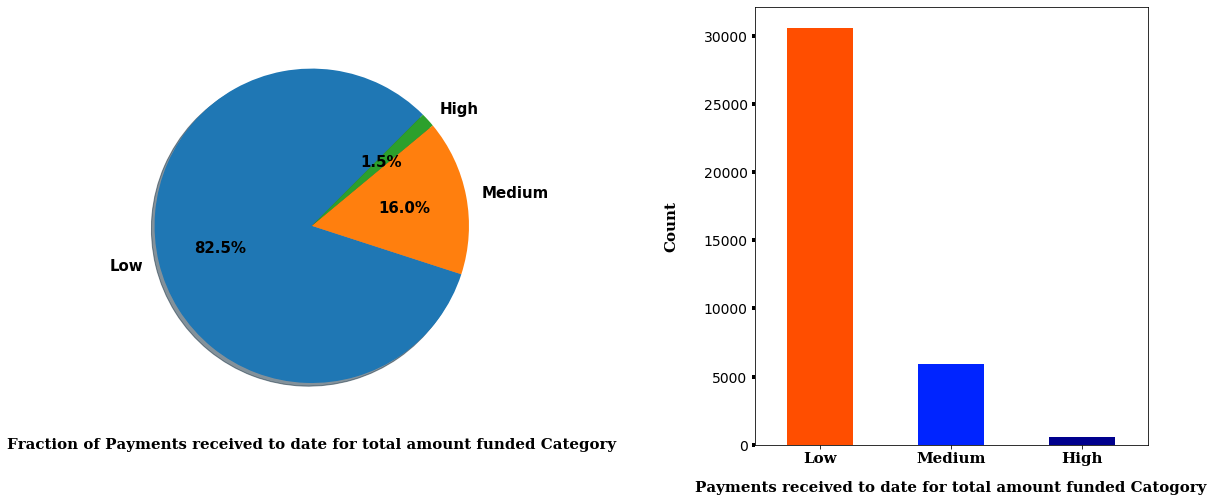

In [157]:
# for total_pymnt

print("Payments received to date for total amount funded Data Overview\n"+20*"==")
print(master_frame.total_pymnt.describe())

master_frame['total_pymnt_cat'], total_pymnt_bins = pd.cut(master_frame['total_pymnt'], 
                                                       3,
                                                         labels=['Low', 'Medium', 'High'], 
                                                         retbins=True
                                                    )

print("\n\nPayments received to date for total amount funded Bins")
print(total_pymnt_bins)

total_pymnt_category_freq = generate_freq_table(master_frame.total_pymnt_cat)
print("\n\nPayments received to date for total amount funded Categorical Overview\n"+20*"==")
print(total_pymnt_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(total_pymnt_category_freq, 
                                   pie_xlabel = "Fraction of Payments received to date for total amount funded Category",
                                   bar_xlabel = "Payments received to date for total amount funded Catogory"
                                   )

> From here we can say that the data is positively skeweed

In [158]:
loan_status_with_total_pymnt = master_frame[["total_pymnt_cat","loan_status"]].groupby(["total_pymnt_cat","loan_status"]).size().reset_index(name="count").sort_values("total_pymnt_cat")

# Create a new column which stores percentage of account 
loan_status_with_total_pymnt = loan_status_with_total_pymnt.assign(percentage = loan_status_with_total_pymnt[['count','total_pymnt_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/total_pymnt_category_freq.loc[x['total_pymnt_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_total_pymnt)

  total_pymnt_cat  loan_status  count  percentage
0             Low  Charged Off   4826       15.78
1             Low      Current    506        1.65
2             Low   Fully Paid  25259       82.57
3          Medium  Charged Off    272        4.58
4          Medium      Current    489        8.24
5          Medium   Fully Paid   5177       87.18
6            High  Charged Off     16        2.93
7            High      Current     82       15.02
8            High   Fully Paid    448       82.05


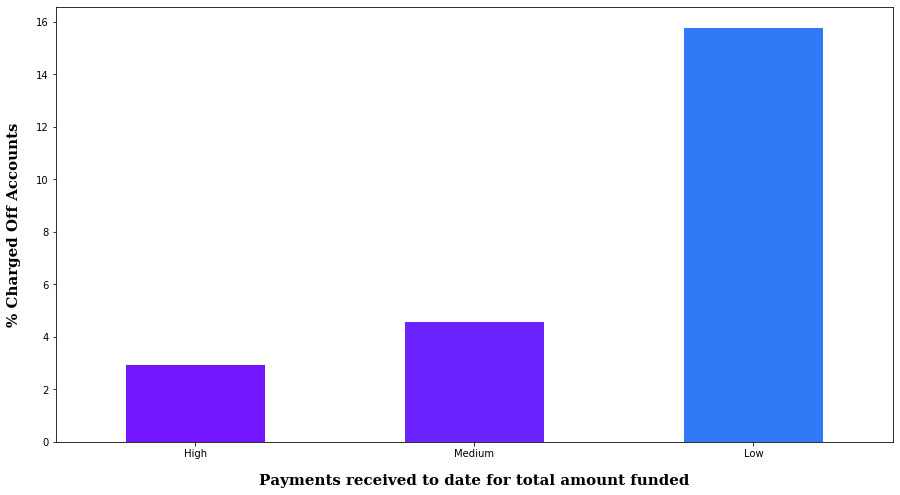

In [159]:
charged_off_df = loan_status_with_total_pymnt[loan_status_with_total_pymnt.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('total_pymnt_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Payments received to date for total amount funded", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)

plt.show()

> We can say that accounts are getting charged off where Payments received to date for total amount funded is on the lower side

In [160]:
feature_columns.append('total_pymnt') # Added as feature column

### Column "total_rec_int"

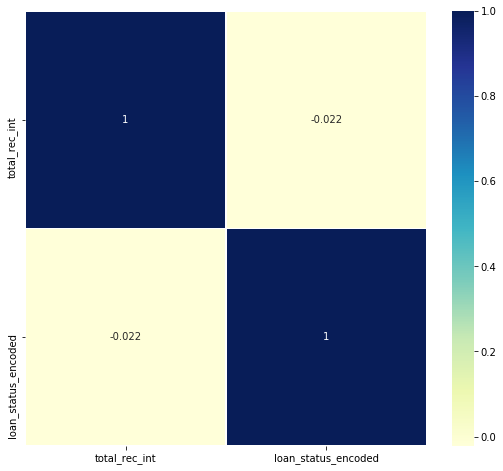

In [161]:
corrmat = master_frame[master_frame.loan_status!="Current"][['total_rec_int', 'loan_status_encoded']].corr()


f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corrmat.style.background_gradient(cmap=cm).set_precision(2)
plt.show()

> There is very little correlation between Loan Status and Total Interest Received Till Date.

### Column "total_rec_late_fee"

Late fees received to date Data Overview
count    37075.000000
mean         1.327712
std          7.158226
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64


Late fees received to date Categorical Overview
          count  percent
Zero      35193    94.92
Non-Zero   1882     5.08


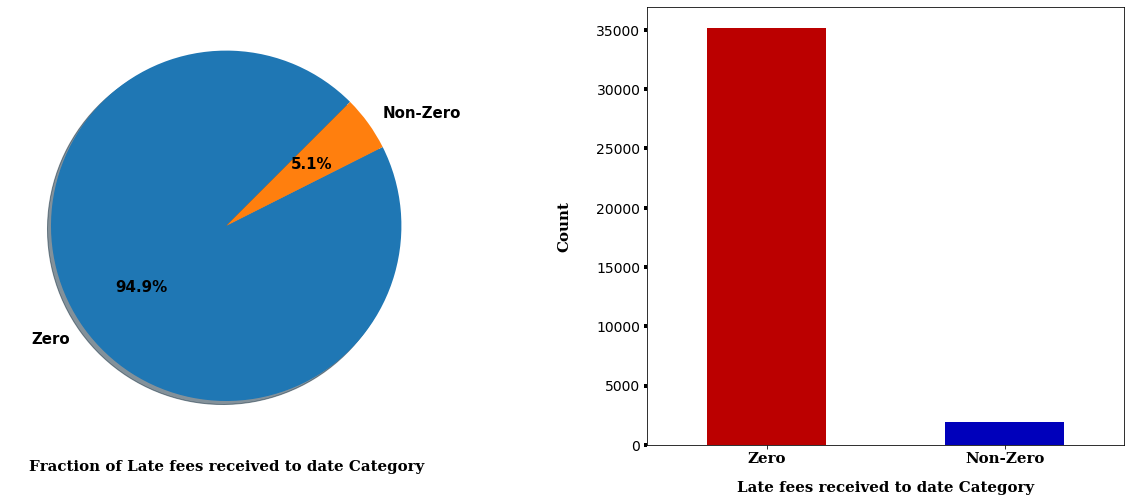

In [162]:
# master_frame.total_rec_late_fee.value_counts()

# for total_rec_late_fee

print("Late fees received to date Data Overview\n"+20*"==")
print(master_frame.total_rec_late_fee.describe())

master_frame['total_rec_late_fee_cat'] = master_frame.total_rec_late_fee.apply(lambda x: "Non-Zero" if x>0 else "Zero")


total_rec_late_fee_category_freq = generate_freq_table(master_frame.total_rec_late_fee_cat)
print("\n\nLate fees received to date Categorical Overview\n"+20*"==")
print(total_rec_late_fee_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(total_rec_late_fee_category_freq, 
                                   pie_xlabel = "Fraction of Late fees received to date Category",
                                   bar_xlabel = "Late fees received to date Category"
                                   )



> There are about 95% data present where Late Fee Received is 0.

In [163]:
loan_status_with_total_rec_late_fee = master_frame[["total_rec_late_fee_cat","loan_status"]].groupby(["total_rec_late_fee_cat","loan_status"]).size().reset_index(name="count").sort_values("total_rec_late_fee_cat")

# Create a new column which stores percentage of account 
loan_status_with_total_rec_late_fee = loan_status_with_total_rec_late_fee.assign(percentage = loan_status_with_total_rec_late_fee[['count','total_rec_late_fee_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/total_rec_late_fee_category_freq.loc[x['total_rec_late_fee_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_total_rec_late_fee)



  total_rec_late_fee_cat  loan_status  count  percentage
0               Non-Zero  Charged Off    795       42.24
1               Non-Zero      Current     47        2.50
2               Non-Zero   Fully Paid   1040       55.26
3                   Zero  Charged Off   4319       12.27
4                   Zero      Current   1030        2.93
5                   Zero   Fully Paid  29844       84.80


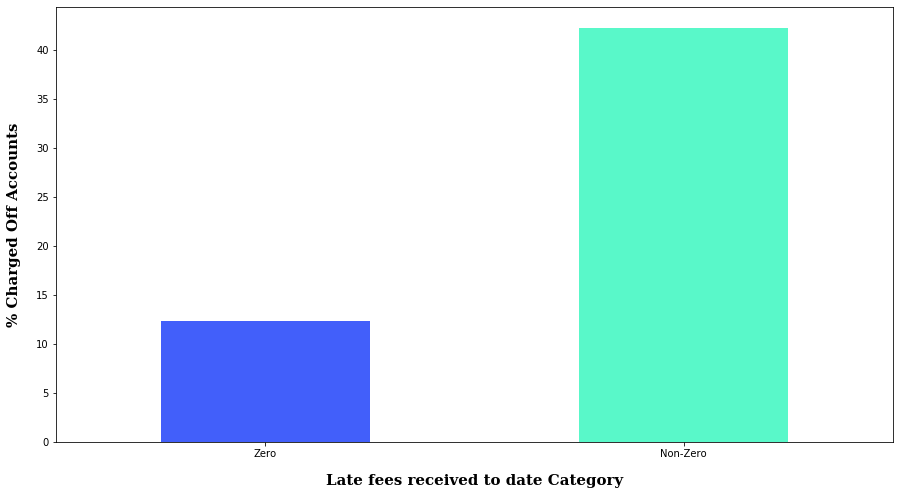

In [164]:
charged_off_df = loan_status_with_total_rec_late_fee[loan_status_with_total_rec_late_fee.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('total_rec_late_fee_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Late fees received to date Category", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)

plt.show()

> We can say that accounts are getting charged off where late fees received to date has non zero values

> There is very little correlation between Loan Status and Late fees received to date.

### Column "recoveries"

post charge off gross recovery Data Overview
count    37075.000000
mean        93.544604
std        685.544689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64


Post charge off gross recovery Categorical Overview
          count  percent
Zero      33208    89.57
Non-Zero   3867    10.43


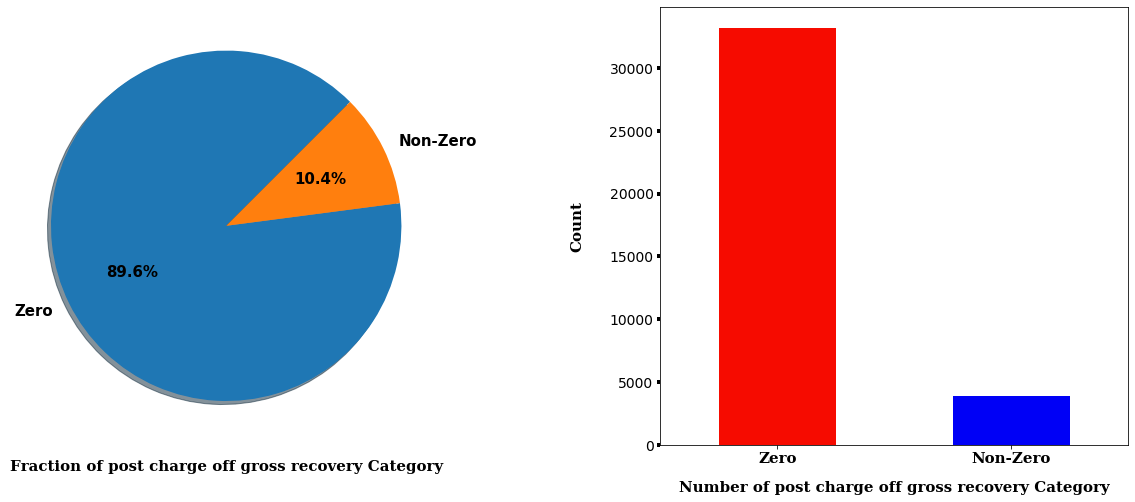

In [165]:
# master_frame[master_frame.recoveries==0].loan_status.value_counts()

# for recoveries

print("post charge off gross recovery Data Overview\n"+20*"==")
print(master_frame.recoveries.describe())

master_frame['recoveries_cat'] = master_frame.recoveries.apply(lambda x: "Non-Zero" if x>0 else "Zero")


recoveries_category_freq = generate_freq_table(master_frame.recoveries_cat)
print("\n\nPost charge off gross recovery Categorical Overview\n"+20*"==")
print(recoveries_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(recoveries_category_freq, 
                                   pie_xlabel = "Fraction of post charge off gross recovery Category",
                                   bar_xlabel = "Number of post charge off gross recovery Category"
                                   )



In [166]:
loan_status_with_recoveries = master_frame[["recoveries_cat","loan_status"]].groupby(["recoveries_cat","loan_status"]).size().reset_index(name="count").sort_values("recoveries_cat")

# Create a new column which stores percentage of account 
loan_status_with_recoveries = loan_status_with_recoveries.assign(percentage = loan_status_with_recoveries[['count','recoveries_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/recoveries_category_freq.loc[x['recoveries_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_recoveries)



  recoveries_cat  loan_status  count  percentage
0       Non-Zero  Charged Off   3867      100.00
1           Zero  Charged Off   1247        3.76
2           Zero      Current   1077        3.24
3           Zero   Fully Paid  30884       93.00


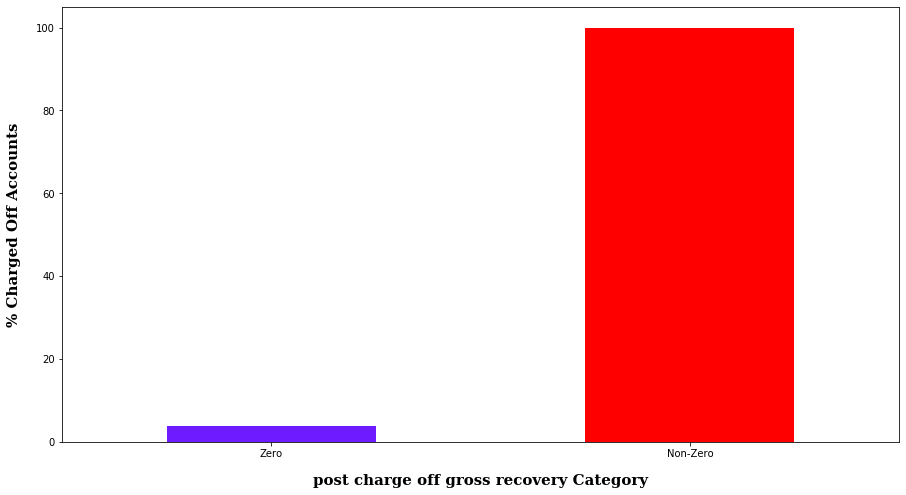

In [167]:
charged_off_df = loan_status_with_recoveries[loan_status_with_recoveries.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('recoveries_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("post charge off gross recovery Category", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)

plt.show()

> As post charge off gross recovery is mostly applicable to accounts which are already charged off. We can ignore this data.

In [168]:
feature_columns.append('recoveries') # Added as feature column

### Column "collection_recovery_fee"

In [169]:
master_frame.collection_recovery_fee.value_counts()

0.000      33615
2.000         11
1.200          9
3.710          9
1.690          8
           ...  
340.000        1
3.250          1
3.750          1
154.890        1
142.474        1
Name: collection_recovery_fee, Length: 2447, dtype: int64

Post charge off collection fee Data Overview
count    37075.000000
mean        11.848785
std        146.101673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64


Post charge off collection fee Categorical Overview
          count  percent
Zero      33208    89.57
Non-Zero   3867    10.43


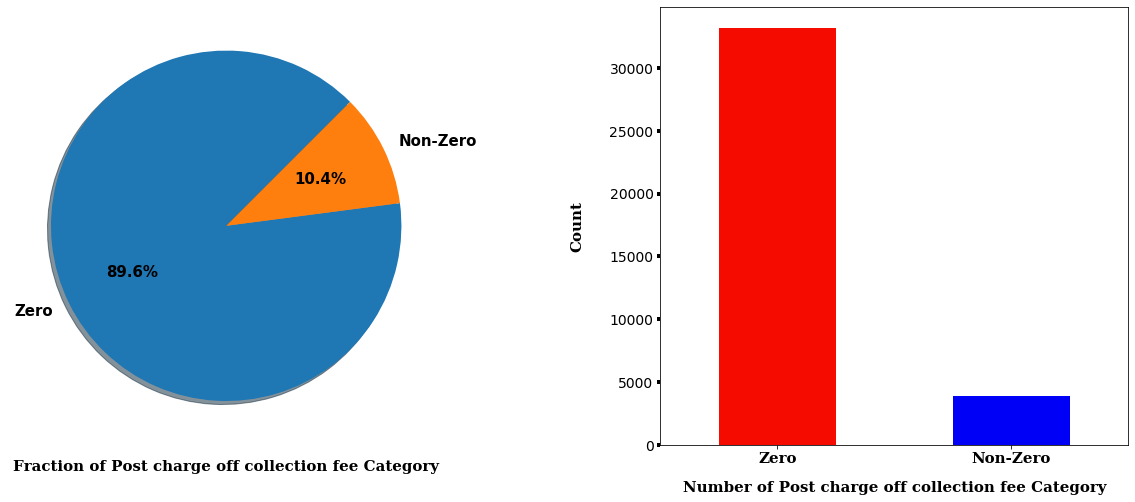

In [170]:
# for collection_recovery_fee

print("Post charge off collection fee Data Overview\n"+20*"==")
print(master_frame.collection_recovery_fee.describe())

master_frame['collection_recovery_fee_cat'] = master_frame.recoveries.apply(lambda x: "Non-Zero" if x>0 else "Zero")


collection_recovery_fee_category_freq = generate_freq_table(master_frame.collection_recovery_fee_cat)
print("\n\nPost charge off collection fee Categorical Overview\n"+20*"==")
print(collection_recovery_fee_category_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(collection_recovery_fee_category_freq, 
                                   pie_xlabel = "Fraction of Post charge off collection fee Category",
                                   bar_xlabel = "Number of Post charge off collection fee Category"
                                   )



In [171]:
loan_status_with_collection_recovery_fee = master_frame[["collection_recovery_fee_cat","loan_status"]].groupby(["collection_recovery_fee_cat","loan_status"]).size().reset_index(name="count").sort_values("collection_recovery_fee_cat")

# Create a new column which stores percentage of account 
loan_status_with_collection_recovery_fee = loan_status_with_collection_recovery_fee.assign(percentage = loan_status_with_collection_recovery_fee[['count','collection_recovery_fee_cat']].apply(lambda x: 
                                                                                                                    round(100*x['count']/collection_recovery_fee_category_freq.loc[x['collection_recovery_fee_cat'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_collection_recovery_fee)



  collection_recovery_fee_cat  loan_status  count  percentage
0                    Non-Zero  Charged Off   3867      100.00
1                        Zero  Charged Off   1247        3.76
2                        Zero      Current   1077        3.24
3                        Zero   Fully Paid  30884       93.00


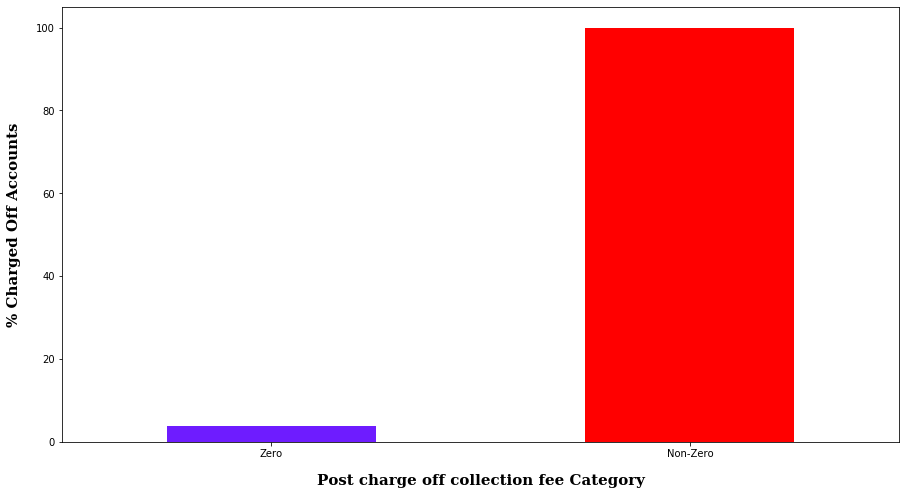

In [172]:
charged_off_df = loan_status_with_collection_recovery_fee[loan_status_with_collection_recovery_fee.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('collection_recovery_fee_cat')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('rainbow')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Post charge off collection fee Category", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)

plt.show()

> As post charge off collection fee is mostly applicable to accounts which are already charged off. We can ignore this data.

### Column "last_pymnt_d"

In [173]:
master_frame.last_pymnt_d

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
           ...    
39475   2008-05-01
39551   2010-02-01
39562   2008-08-01
39573   2010-05-01
39623   2008-05-01
Name: last_pymnt_d, Length: 37075, dtype: datetime64[ns]

In [174]:
# Extract Month from last payment received date
master_frame['last_pymnt_d_month'] = master_frame['last_pymnt_d'].dt.strftime("%b")

Last month payment was received Data Overview
count     37075
unique       12
top         May
freq       4038
Name: last_pymnt_d_month, dtype: object


Last month payment was received Overview
     count  percent
May   4038    10.89
Mar   3487     9.41
Dec   3272     8.83
Oct   3068     8.28
Aug   3057     8.25
Jul   3031     8.18
Apr   3011     8.12
Feb   2964     7.99
Sep   2821     7.61
Jan   2816     7.60
Jun   2766     7.46
Nov   2744     7.40


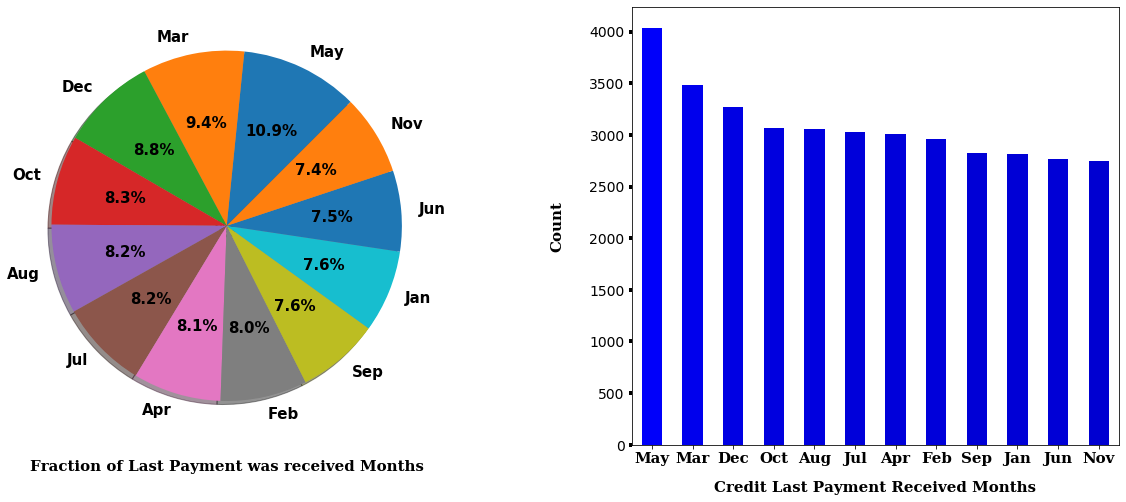

In [175]:
# For earliest_cr_line / earliest_cr_line_month
print("Last month payment was received Data Overview\n"+20*"==")
print(master_frame.last_pymnt_d_month.describe())

last_pymnt_d_month_freq = generate_freq_table(master_frame.last_pymnt_d_month)
print("\n\nLast month payment was received Overview\n"+20*"==")
print(last_pymnt_d_month_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(last_pymnt_d_month_freq, 
                                   pie_xlabel = "Fraction of Last Payment was received Months",
                                   bar_xlabel = "Credit Last Payment Received Months"
                                   )

> We can see that in the month of "May" most number of payments were received

In [176]:
loan_status_with_last_pymnt_d_month = master_frame[["last_pymnt_d_month","loan_status"]].groupby(["last_pymnt_d_month","loan_status"]).size().reset_index(name="count").sort_values("last_pymnt_d_month")
# Create a new column which stores percentage of account 
loan_status_with_last_pymnt_d_month = loan_status_with_last_pymnt_d_month.assign(percentage = loan_status_with_last_pymnt_d_month[['count','last_pymnt_d_month']].apply(lambda x: 
                                                                                                                    round(100*x['count']/last_pymnt_d_month_freq.loc[x['last_pymnt_d_month'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_last_pymnt_d_month)

   last_pymnt_d_month  loan_status  count  percentage
0                 Apr  Charged Off    417       13.85
1                 Apr      Current     46        1.53
2                 Apr   Fully Paid   2548       84.62
3                 Aug  Charged Off    425       13.90
4                 Aug   Fully Paid   2632       86.10
5                 Dec  Charged Off    446       13.63
6                 Dec   Fully Paid   2826       86.37
7                 Feb  Charged Off    391       13.19
8                 Feb   Fully Paid   2573       86.81
9                 Jan  Charged Off    393       13.96
10                Jan   Fully Paid   2423       86.04
12                Jul   Fully Paid   2544       83.93
11                Jul  Charged Off    487       16.07
13                Jun  Charged Off    426       15.40
14                Jun   Fully Paid   2340       84.60
15                Mar  Charged Off    383       10.98
16                Mar   Fully Paid   3104       89.02
17                May  Charg

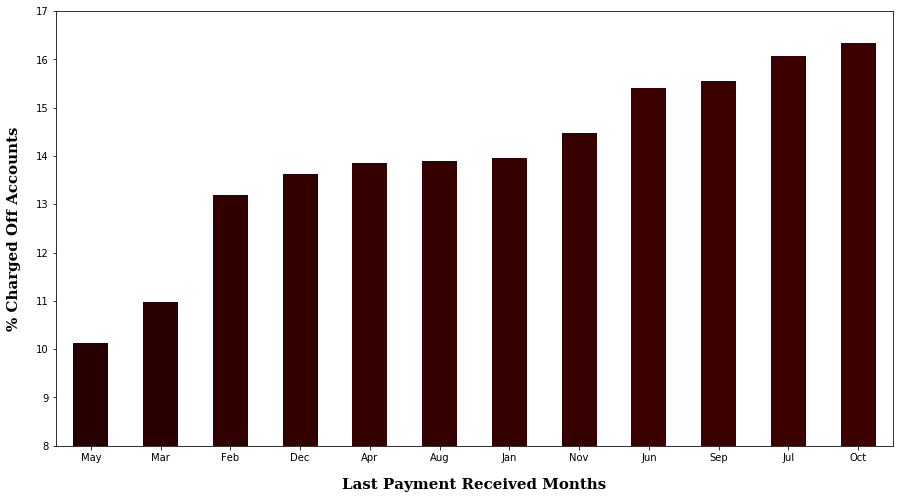

In [177]:
charged_off_df = loan_status_with_last_pymnt_d_month[loan_status_with_last_pymnt_d_month.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('last_pymnt_d_month')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('gist_heat')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Last Payment Received Months", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(8,17)

plt.show()

> We can say that Accounts where most accounts are getting charged off made last payment on "Jul" or "Oct".

> __Although we can see a pattern here if we analyse this scenario there is no such significance for this correlation.__

### Column "last_pymnt_amnt"

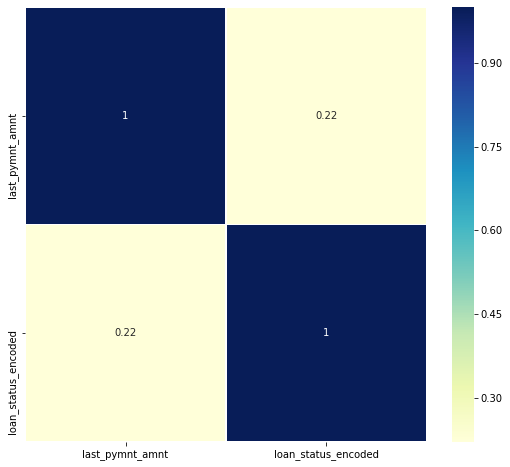

In [178]:
corrmat = master_frame[master_frame.loan_status!="Current"][['last_pymnt_amnt', 'loan_status_encoded']].corr()


f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corrmat.style.background_gradient(cmap=cm).set_precision(2)
plt.show()

> From this correlation matrix we can say that there is a little possitive correlation between Last total payment amount received and loan status


In [179]:
feature_columns.append('last_pymnt_amnt') # Added as feature column

### Column "last_credit_pull_d"

In [180]:
master_frame.last_credit_pull_d

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39475   2015-10-01
39551   2014-05-01
39562   2008-08-01
39573   2016-04-01
39623   2016-05-01
Name: last_credit_pull_d, Length: 37075, dtype: datetime64[ns]

In [181]:
# Extract the month from The most recent month LC pulled credit for this loan 
master_frame['last_credit_pull_d_month'] = master_frame['last_credit_pull_d'].dt.strftime("%b")

The most recent month LC pulled credit for this loan Data Overview
count     37075
unique       12
top         May
freq      11514
Name: last_credit_pull_d_month, dtype: object


The most recent month LC pulled credit for this loan Overview
     count  percent
May  11514    31.06
Apr   4099    11.06
Mar   3086     8.32
Feb   2857     7.71
Dec   2227     6.01
Nov   2063     5.56
Sep   1970     5.31
Oct   1919     5.18
Jan   1916     5.17
Jul   1903     5.13
Aug   1891     5.10
Jun   1630     4.40


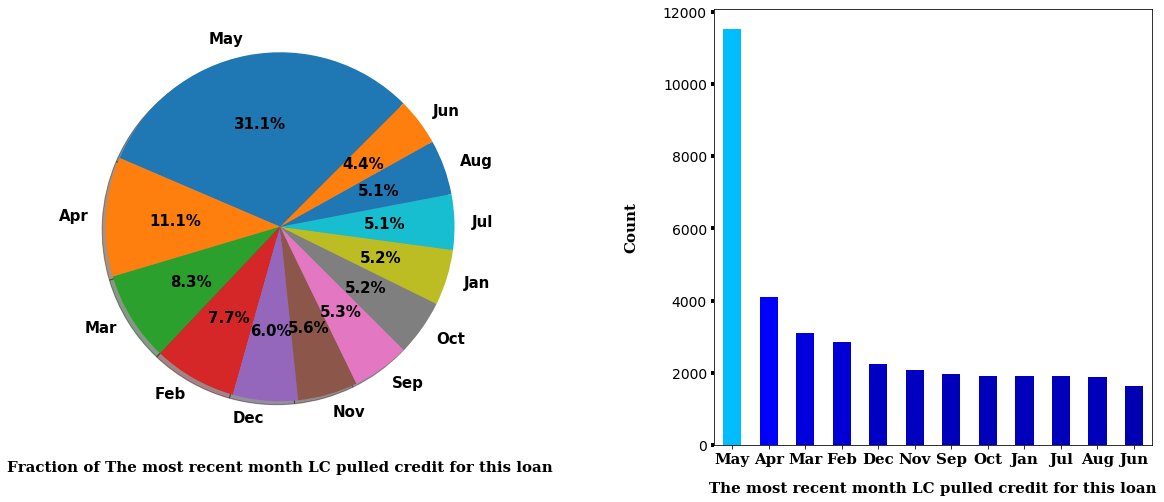

In [182]:
# last_credit_pull_d / last_credit_pull_d_month 
print("The most recent month LC pulled credit for this loan Data Overview\n"+20*"==")
print(master_frame.last_credit_pull_d_month.describe())

last_credit_pull_d_month_freq = generate_freq_table(master_frame.last_credit_pull_d_month)
print("\n\nThe most recent month LC pulled credit for this loan Overview\n"+20*"==")
print(last_credit_pull_d_month_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(last_credit_pull_d_month_freq, 
                                   pie_xlabel = "Fraction of The most recent month LC pulled credit for this loan",
                                   bar_xlabel = "The most recent month LC pulled credit for this loan"
                                   )

> The most common month is "May"

In [183]:
loan_status_with_last_credit_pull_d_month = master_frame[["last_credit_pull_d_month","loan_status"]].groupby(["last_credit_pull_d_month","loan_status"]).size().reset_index(name="count").sort_values("last_credit_pull_d_month")

# Create a new column which stores percentage of account 
loan_status_with_last_credit_pull_d_month = loan_status_with_last_credit_pull_d_month.assign(percentage = loan_status_with_last_credit_pull_d_month[['count','last_credit_pull_d_month']].apply(lambda x: 
                                                                                                                    round(100*x['count']/last_credit_pull_d_month_freq.loc[x['last_credit_pull_d_month'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_last_credit_pull_d_month)

   last_credit_pull_d_month  loan_status  count  percentage
0                       Apr  Charged Off    527       12.86
1                       Apr      Current    146        3.56
2                       Apr   Fully Paid   3426       83.58
3                       Aug  Charged Off    233       12.32
4                       Aug   Fully Paid   1658       87.68
5                       Dec  Charged Off    329       14.77
6                       Dec   Fully Paid   1898       85.23
7                       Feb  Charged Off    358       12.53
8                       Feb      Current      3        0.11
9                       Feb   Fully Paid   2496       87.36
10                      Jan  Charged Off    178        9.29
11                      Jan      Current      3        0.16
12                      Jan   Fully Paid   1735       90.55
14                      Jul   Fully Paid   1679       88.23
13                      Jul  Charged Off    224       11.77
15                      Jun  Charged Off

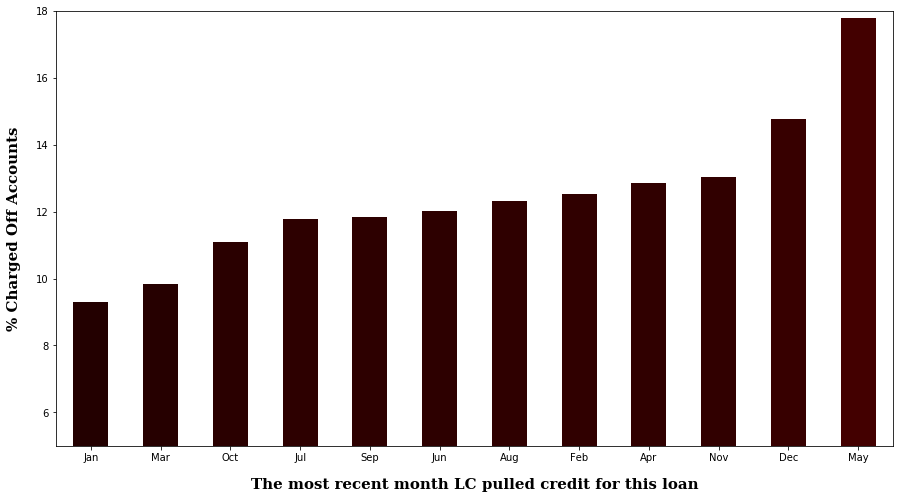

In [184]:
charged_off_df = loan_status_with_last_credit_pull_d_month[loan_status_with_last_credit_pull_d_month.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('last_credit_pull_d_month')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('gist_heat')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("The most recent month LC pulled credit for this loan", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(5,18)

plt.show()

> Accounts are getting charged off where The most recent month LC pulled credit for this loan is "May".

> __Although we can see a pattern here if we analyse this scenario there is no such significance for this correlation.__

### Column "pub_rec_bankruptcies"

In [185]:
# Convert "pub_rec_bankruptcies" column to category
master_frame.pub_rec_bankruptcies = master_frame.pub_rec_bankruptcies.astype("category")

Number of public record bankruptcies Data Overview
count     37075.0
unique        3.0
top           0.0
freq      35522.0
Name: pub_rec_bankruptcies, dtype: float64


Number of public record bankruptcies Overview
     count  percent
0.0  35522    95.81
1.0   1546     4.17
2.0      7     0.02


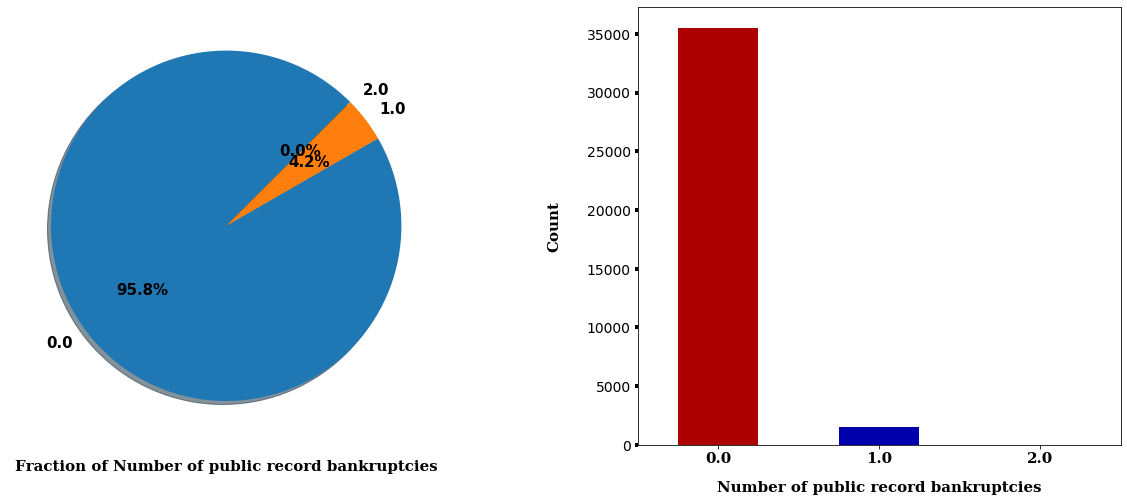

In [186]:
# for pub_rec_bankruptcies
print("Number of public record bankruptcies Data Overview\n"+20*"==")
print(master_frame.pub_rec_bankruptcies.describe())

pub_rec_bankruptcies_freq = generate_freq_table(master_frame.pub_rec_bankruptcies)
print("\n\nNumber of public record bankruptcies Overview\n"+20*"==")
print(pub_rec_bankruptcies_freq)
print(25*"===")

plot_pie_char_bar_plot_categorical(pub_rec_bankruptcies_freq, 
                                   pie_xlabel = "Fraction of Number of public record bankruptcies",
                                   bar_xlabel = "Number of public record bankruptcies"
                                   )

In [187]:
loan_status_with_pub_rec_bankruptcies = master_frame[["pub_rec_bankruptcies","loan_status"]].groupby(["pub_rec_bankruptcies","loan_status"]).size().reset_index(name="count").sort_values("pub_rec_bankruptcies")

# Create a new column which stores percentage of account 
loan_status_with_pub_rec_bankruptcies = loan_status_with_pub_rec_bankruptcies.assign(percentage = loan_status_with_pub_rec_bankruptcies[['count','pub_rec_bankruptcies']].apply(lambda x: 
                                                                                                                    round(100*x['count']/pub_rec_bankruptcies_freq.loc[x['pub_rec_bankruptcies'], 'count'],2), 
                                                                                                                    axis=1))

print(loan_status_with_pub_rec_bankruptcies)

  pub_rec_bankruptcies  loan_status  count  percentage
0                  0.0  Charged Off   4785       13.47
1                  0.0      Current   1042        2.93
2                  0.0   Fully Paid  29695       83.60
3                  1.0  Charged Off    327       21.15
4                  1.0      Current     33        2.13
5                  1.0   Fully Paid   1186       76.71
6                  2.0  Charged Off      2       28.57
7                  2.0      Current      2       28.57
8                  2.0   Fully Paid      3       42.86


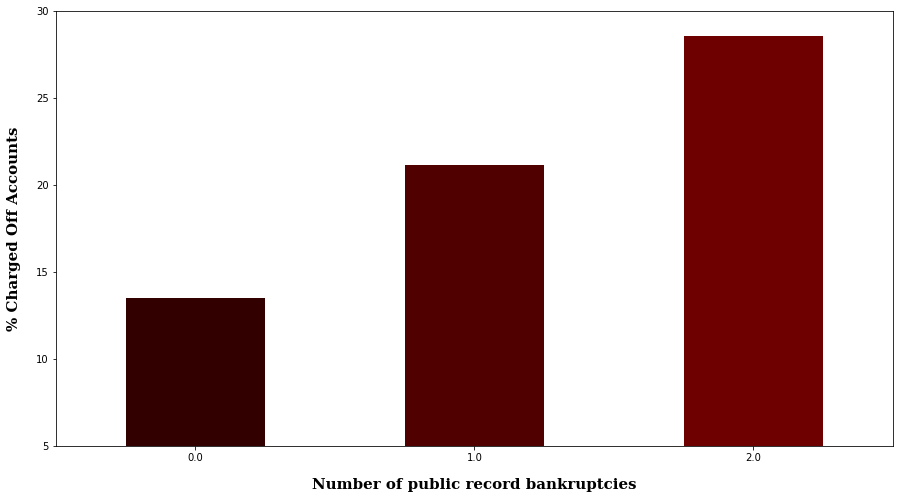

In [188]:
charged_off_df = loan_status_with_pub_rec_bankruptcies[loan_status_with_pub_rec_bankruptcies.loan_status=='Charged Off'].sort_values(['percentage'])
charged_off_df = charged_off_df.set_index('pub_rec_bankruptcies')

font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

fig, axes = plt.subplots(1,1, figsize=(15,8))
cmap = mpl.cm.get_cmap('gist_heat')
colors = cmap(charged_off_df['percentage'].values/100)

charged_off_df['percentage'].plot(kind='bar', color = colors, ax=axes)
plt.xlabel("Number of public record bankruptcies", labelpad=15, fontdict=font)
plt.ylabel("% Charged Off Accounts", labelpad=15, fontdict=font)
plt.xticks(rotation=0)
plt.ylim(5,30)

plt.show()

> As the number of public record bankrupties increases the account getting charged off increases.

In [189]:
feature_columns.append('pub_rec_bankruptcies') # Added as feature column

## List of Columns which are problably the driving factors of an account being charged off

In [190]:
# Read the Data Dictionary ( Description of the columns)
data_description = pd.read_excel("Data_Dictionary.xlsx")

In [191]:
data_description = data_description.set_index("LoanStatNew")

In [192]:
print("The Columns which are the probable driving factors for an account being charged off are")
print(30*"===")

for i, row in data_description.iterrows():
    if i in feature_columns:
        print(i,"-->",row.Description,"\n")

The Columns which are the probable driving factors for an account being charged off are
addr_state --> The state provided by the borrower in the loan application 

annual_inc --> The self-reported annual income provided by the borrower during registration. 

delinq_2yrs --> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years 

dti --> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. 

earliest_cr_line --> The month the borrower's earliest reported credit line was opened 

emp_length --> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  

grade --> LC assigned loan grade 

home_ownership --> The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTH

## Summary:

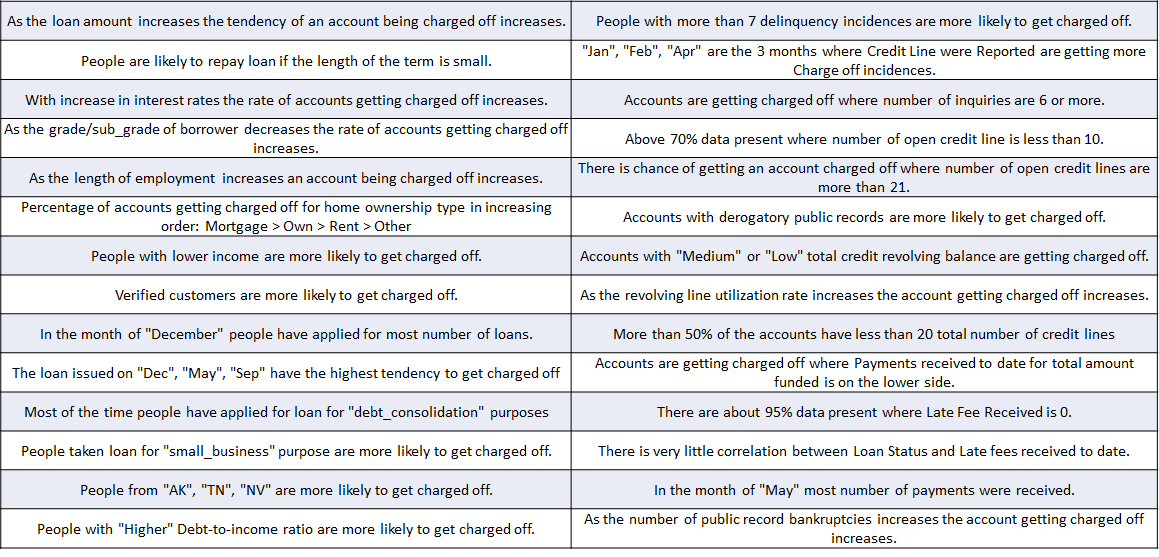